## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 4: The Final One!

- **100 points [7% of your final grade]**
- **Due April 28, 2022 11:59pm** 
- (*no submissions accepted after May 3, 2022 by 11:59pm*)

*Goals of this homework:* This is an **open-ended** assignment in which you will get to explore embeddings in the context of a large social media dataset. 

*Submission instructions:* You should post your notebook to canvas (look for the homework 4 assignment there). Name your submission **your-uin_hw4.ipynb**, so for example, my submission would be something like **555001234_hw4.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. When you are done, download your notebook from colab and submit it to canvas.

*Collaboration declaration:* If you talked to anyone about this homework, please be sure to mention that. Remember to include citations to any sources you use in the homework.

*Write your collaboration/references here*

## Instructions: 

For this homework, you will conduct an independent data mining analysis using embeddings of the congressional Twitter dataset we used in Homework 2. The requirements are threefold:

*   You must use some (or all) of the US Congress Twitter data we provided in Homework 2. You may augment the data if you like, but that is not required. Also feel free to sample just a portion of the data (you do not have to use all of it).
*   You must learn embeddings over the dataset. You may use word2vec to find word embeddings, node2vec to find node embeddings, or some other dense representation. It is up to you, but you must learn some kind of embedding. You may use an existing package to learn these embeddings. Feel free to google around to find the right resource. Some examples include: 

  * word2vec (python, in Gensim) https://radimrehurek.com/gensim/models/word2vec.html
  * doc2vec (python, in Gensim) https://radimrehurek.com/gensim/models/doc2vec.html
  * Node2Vec (python) https://github.com/aditya-grover/node2vec
  * LINE (C++) https://github.com/tangjianpku/LINE
  * DeepWalk (python) https://github.com/phanein/deepwalk, https://pypi.org/project/deepwalk/

* Using these embeddings, you must conduct an interesting analysis of the dataset. For example, are there communities of users you can discover in the node embedding space? Are there outliers in the word embedding space? This is the most interesting part, and you should do your best to make this compelling.


### In the following, you should answer the questions we pose. Then below, you should include your code, including helpful comments and discussion so we can follow your logic.




##  Question 1

What is your compelling data mining application? That is, what is it you aim to discover?

ANSWER:


In this exercise I did 3 experiments with the data provided and found quite interesting results. 
1. First experiment: I converted the tweets in the given datasets into embeddings to find possible clusters in it. I had randomly sampled out a subset of this dataset for this experiment. I also did sentiment analysis of all these tweets. Using the sentiments as colors and the vector embeddings as positions, I plotted them in both 2D and 3D plots (using both Principal Component Analysis (PCA) and t-SNE(t-distributed stochastic neighbor embedding) dimensionality reduction was achieved). My aim here was to find meaningful clusters in a random sample of the tweets dataset and figure out the dominant sentiments (positive or negative) in the clusters.
2. Second experiment: I filtered only the congress members tweets, found their embeddings, and plotted them in 2D and 3D plots. Then I used k-means algorithm to find possible clusters in the dataset. My aim here was to divide the tweets from the congress members into 2 distinct clusters to possibly denote twitter users from the 2 different parties: democrats and republicans.
3. Third experiment: I used word2vec model to find the word embeddings of all the words present in the tweets (except the stopwords) and then found the top 30 words which are most similar (in the given tweets dataset) to "realdonaldtrump","lindseygrahamsc", and "speakerpelosi" user names. I plotted the vector embeddings of all these words in both 2D and 3D plots and found 3 distinct clusters in the plots. My aim was to find out the words/topics which are most associated with the 3 user names. I repeated the same experiment with the words "republican" and "democrat" instead of the user names.

##  Question 2

What data did you use? Describe briefly what aspects of the US Congressional data you used.

ANSWER:

I used the https://us-congress.s3.amazonaws.com/tweets-sample-400k.json and https://us-congress.s3.amazonaws.com/congress_members.csv files for my experiments.

1. In experiment 1, I took a sample (5000) of the tweets from the https://us-congress.s3.amazonaws.com/tweets-sample-400k.json dataset and used their vector embeddings to plot 2D and 3D plots. I also found the sentiments associated with all these tweets and denoted them with different colors in the plots. 

2. In experiment 2, I used the https://us-congress.s3.amazonaws.com/congress_members.csv dataset and found the twitter user ids of all the congress members from the dataset using the following code:

  congress_ids=congress_members["userid"]

  Using these ids, I found out all the rows from only these ids in the file https://us-congress.s3.amazonaws.com/tweets-sample-400k.json using the following line of code:

  df_con=tweets_sample[tweets_sample['user_id'].isin(congress_ids)]

  In here, I consider only the aspect of the tweets from the congress members to find possible clusters in them.

3. In experiment 3, I took all the words from all the tweets in the https://us-congress.s3.amazonaws.com/tweets-sample-400k.json dataset (except the stopwords) and used their vector embeddings to find words similar to some specific interesting words such as "realdonaldtrump", "lindseygrahamsc", "speakerpelosi", "republican", and "democrat" (using cosine similarities). I assumed that the tweets would give out a possible relation between the various words based on the context and frequency in which they were used together. Based on this assumption I found out the most similar/associated words with certain interesting words and usernames. The similar words indicate topics here so this analysis shows what topics are most related to these words based on the tweets dataset.



##  Question 3

What embedding method did you use? And why?

ANSWER:

I used 2 different embedding methods in my experiments:

1. Word2Vec: I used Word2Vec embedding method to find the vector embeddings of all the important words in the tweets dataset. I used these embeddings in my 3rd experiment to find the topics/words which are most related to the certain interesting words/usernames such as "realdonaldtrump","lindseygrahamsc","speakerpelosi", "republican", and "democrat". I used these embeddings as these give a meaningful representation of the different words in the vector space which I could then use for finding similar/most associated words (using cosine-similarity).

2. paraphrase-xlm-r-multilingual-v1 from Hugging Face: This is a sentence-transformers model which maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search. I used this method to embed a sample of all the different tweets in the dataset and plotted them in 2D and 3D plots in my first and second experiment. I used these embeddings as these give a meaningful representation of the different tweet sentences in the vector space which I could then use for clustering. 


Apart from these 2 embedding approaches, I also used the TextBlob python library to find out the sentiments (positive or negative) associated with the different tweets which I then showed as different colors in the plots. I also used k-means algorithm for clustering in my second experiment.


##  Question 4

How did you apply your embeddings to tackle the problem you posed?

ANSWER: 

I used the embedding methods in the following way:

1. In experiment 1, I filtered out a sample of all the individual tweets in the dataset and found their sentence embeddings using the paraphrase-xlm-r-multilingual-v1 embedding method. Then I used PCA and t-SNE methods on the vector embeddings to lower their dimensions from 768 to 3 and 2 dimensions which I then used to plot 3D and 2D plots respectively. These plots showed 2 distinct clusters. I also plotted the sentiments associated with all the individual points in the plot which I denoted using different colors. 

2. In experiment 2, I filtered only the tweets from the various congress members in the entire tweets dataset and used the paraphrase-xlm-r-multilingual-v1 embedding method to find the sentence embeddings of these tweets. Then I used PCA and t-SNE methods on the vector embeddings to lower their dimensions from 768 to 3 and 2 dimension vectors which I then used to plot 3D and 2D plots respectively. Then I used the k-means algorithm to divide the points in these plots into 2 distinct clusters which possibly denote the "republicans" and "demoncrats".

3. In experiment 3, I found out all the different words in the individual tweets (except the stopwords) in the tweets dataset and used Word2Vec to find the respective vector embeddings of these words. Then I used these vector embeddings to find the words most associated to some interesting words/usernames (realdonaldtrump", "lindseygrahamsc", "speakerpelosi", "republican", and "democrat") which was computed using the cosine similarities between the various words embeddings (higher the cosine similarity between the 2 words, more is their association). Then I plotted these vector embeddings (after dimensionality reduction using t-SNE) of the most associated words to the given keywords in 2D and 3D plots and noticed certain cluster formations in these plots.

##  Question 5

What did you discover? Provide your results and analysis here.

ANSWER:

I did the following analysis and found the following results in my experiments:

1. In experiment 1 (7 plots associated with experiment 1 are marked in the code portion below):

    a. I took the various tweets in the https://us-congress.s3.amazonaws.com/tweets-sample-400k.json dataset rows, randomly sampled out 5000 of the tweets, and computed their sentence embeddings using the paraphrase-xlm-r-multilingual-v1 embedding method after pre-processing the tweets.

    b. I used PCA(Principal Component Analysis) to lower the dimensions of these embeddings from 768 dimensions to 3 dimension vectors and plotted them in 2D and 3D plots (the plots can be found in the code below). I also computed the sentiments of the individual preprocessed sentences and denoted the postive sentences as green data points and negative sentences as red data points. 2D plots were plotted by taking out any 2 axes out of the 3 axes in the PCA output, so a total of three 2D plots and one 3D plot are plotted for this case, plot numbers ranges from Experiment 1 - plot 1 to Experiment 1 - plot 4.

      Based on these plots we can see 2 clusters, although they are not properly visible in these plots. So I used t-SNE to do the dimension reduction in my next step. I used t-SNE in 2 different ways:

      -> First, I used t-SNE (t-distributed stochastic neighbor embedding) to directly reduce the 768 dimension vectors to 2 dimension vectors and obtained a 2D plot. In this plot also (Experiment 1 - plot 5), the 2 clusters are not properly visible so I used a second method.

      -> Second, I used PCA to first reduce the dimensions from 768 dimensions vectors to 50 dimension vectors and then I used t-SNE to reduce these 50 dimension vectors to 2 dimension vectors (this is the recommended way to do dimension reduction). I used these 2 dimension vectors to obtain the 2D plot (Experiment 1 - plot 6) shown in the code section below. From these plots, 2 data clusters are visible: one big and one small cluster. Based on the green and red colors of these data points we can also note that the big cluster has both positive and negative sentiments associated with it. However, the smaller cluster has only negative sentiments associated with it. So this demonstrates that there are certain tweets on twitter which are very negative and they are generally very far away in terms of context from the normal tweets found on twitter.

  
2. In experiment 2 (3 plots associated with experiment 2 are marked in the code portion below):

    a.  I used the https://us-congress.s3.amazonaws.com/congress_members.csv dataset and found the twitter user ids of all the congress members from the dataset using the following code:
    
    congress_ids=congress_members["userid"]
    
    Using these ids, I found out all the rows from only these ids in the file https://us-congress.s3.amazonaws.com/tweets-sample-400k.json using the following line of code:
    
    df_con=tweets_sample[tweets_sample['user_id'].isin(congress_ids)]
    
    I filtered out the tweets from the https://us-congress.s3.amazonaws.com/tweets-sample-400k.json dataset and these gave me the tweets from only the congress members.

    b. Then I used the the paraphrase-xlm-r-multilingual-v1 embedding method to find the sentence embedddings of the individual tweets after preprocessing them.

    c. Next, I used both PCA and t-SNE to lower dimensions from 768 dimension to 2 and 3 dimensions and plotted the 2D and 3D plots (Experiment 2 - plot 1 to Experiment 2 - plot 3). I used k-means clustering algorithm to divide the datapoints into 2 clusters which can be seen in the plots present in the code section below. These 2 clusters possibly denotes tweets from users who are either "democrats" or "republicans"

3. In experiment 3 (5 plots associated with experiment 3 are marked in the code portion below):

    a. I extracted all the words from the individual tweets in the tweets dataset and removed the stop words.

    b. Then I used Word2Vec embedding method to find the embedding vectors of all the these words. 

    c. Then I used these vector embeddings to find the words most associated to some interesting usernames on twitter (realdonaldtrump","lindseygrahamsc","speakerpelosi") which was computed using the cosine similarities between the various words embeddings (higher the cosine similarity between the 2 words, more is their association). Following is the output obtained: 
    
          For user realdonaldtrump the most similar words are:

          1. tariffs
          2. presssec
          3. buildthewall
          4. vp
          5. embarrassing
          6. whitehouse
          7. jalicat
          8. leaderhoyer
          9. foxnews
          10. trumps
          11. trumpshutdown
          12. senatortomudall
          13. mexico
          14. obama
          15. willing
          16. america
          17. disaster
          18. thehill
          19. senronjohnson
          20. pence
          21. meant
          22. walls
          23. promised
          24. trade
          25. desperate
          26. stopping
          27. keeps
          28. trump
          29. housedemocrats
          30. continuing

          For user lindseygrahamsc the most similar words are:

          1. graham
          2. lindsey
          3. randpaul
          4. repmarkmeadows
          5. davidcicilline
          6. senjeffmerkley
          7. justinamash
          8. sensanders
          9. stevedaines
          10. repratcliffe
          11. senjohnkennedy
          12. maziehirono
          13. senduckworth
          14. senorrinhatch
          15. repmattgaetz
          16. corybooker
          17. repadamschiff
          18. clairecmc
          19. chuckgrassley
          20. chrismurphyct
          21. jiminhofe
          22. rokhanna
          23. jeffflake
          24. brianschatz
          25. stevescalise
          26. johncornyn
          27. senjoniernst
          28. stabenow
          29. marcorubio
          30. amyklobuchar

           For user speakerpelosi the most similar words are:

          1. nancypelosi
          2. chuck
          3. senatedems
          4. nydiavelazquez
          5. repbarbaralee
          6. repjeffries
          7. jalicat
          8. repalgreen
          9. reptimryan
          10. simply
          11. democracy
          12. repjayapal
          13. avoid
          14. representatives
          15. forthepeople
          16. repswalwell
          17. inquiry
          18. repjoekennedy
          19. repteddeutch
          20. pattymurray
          21. stevescalise
          22. repcohen
          23. passing
          24. pelosi
          25. address
          26. unacceptable
          27. lives
          28. teampelosi
          29. cruel
          30. repjudychu

  Then I plotted these vector embeddings of the most associated words in 2D and 3D plots (dimensionality reduction was done using t-SNE method -> plots ranging from Experiment 3 - plot 2 to Experiment 3 - plot 3) and noticed certain cluster formations in these plots which is expected. This demonstrates that the words most commonly associated with these specific usernames have a significant distinction between them indicating their differences in ideologies.  The plots are provided in the code section below.
  
  I repeated the similar exercise for the words :"republican", and "democrat" and obtained the following results. The plots are in the code section below (plots ranging from Experiment 3 - plot 4 to Experiment 3 - plot 5). 

        For the term republican the most similar words are:

        1. democratic
        2. democrat
        3. gop
        4. opposed
        5. republicans
        6. stabenow
        7. flake
        8. farr
        9. single
        10. amash
        11. vs
        12. susan
        13. johnjamesmi
        14. publicly
        15. thomas
        16. collins
        17. votes
        18. supported
        19. soledadobrien
        20. legislative
        21. voted
        22. leader
        23. seat
        24. minority
        25. nomination
        26. elect
        27. presidential
        28. conservative
        29. member
        30. caucus

        For the term democrat the most similar words are:

        1. democratic
        2. republican
        3. vs
        4. politician
        5. candidate
        6. race
        7. liberal
        8. democrats
        9. primary
        10. stabenow
        11. member
        12. attempt
        13. realsaavedra
        14. conservative
        15. socialist
        16. charliekirk11
        17. majority
        18. movement
        19. single
        20. leftist
        21. points
        22. poll
        23. seat
        24. semitic
        25. representatives
        26. supported
        27. caucus
        28. realcandaceo
        29. presidential
        30. dems


            





# Your Analysis

In [ ]:
# you should add as many cells as you need below 

"""Downloading the datasets"""

!mkdir us-congress-tweets
!wget https://us-congress.s3.amazonaws.com/congress_members.csv -O us-congress-tweets/congress_members.csv
!wget https://us-congress.s3.amazonaws.com/tweets-sample-400k.json -O us-congress-tweets/tweets-sample-400k.json
!wget https://us-congress.s3.amazonaws.com/user_hashtags-1m.csv -O us-congress-tweets/user_hashtags-1m.csv
!wget https://us-congress.s3.amazonaws.com/user_mentions.csv -O us-congress-tweets/user_mentions.csv


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

--2022-05-02 17:19:21--  https://us-congress.s3.amazonaws.com/congress_members.csv
Resolving us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)... 54.231.139.153
Connecting to us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)|54.231.139.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13835 (14K) [text/csv]
Saving to: ‘us-congress-tweets/congress_members.csv’

us-congress-tweets/ 100%[===================>]  13.51K  --.-KB/s    in 0s      

2022-05-02 17:19:22 (115 MB/s) - ‘us-congress-tweets/congress_members.csv’ saved [13835/13835]

--2022-05-02 17:19:22--  https://us-congress.s3.amazonaws.com/tweets-sample-400k.json
Resolving us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)... 52.217.168.9
Connecting to us-congress.s3.amazonaws.com (us-congress.s3.amazonaws.com)|52.217.168.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202495914 (193M) [application/json]
Saving to: ‘us-congress-tweets/tweets-sampl

# Experiment 1

In [ ]:
import re

In [ ]:
"""Reading the datasets"""

congress_members=pd.read_csv("us-congress-tweets/congress_members.csv")
user_mentions=pd.read_csv("us-congress-tweets/user_mentions.csv")

user_hashtags=pd.read_csv("us-congress-tweets/user_hashtags-1m.csv")
# 

In [ ]:
tweets_sample=pd.read_json("us-congress-tweets/tweets-sample-400k.json", lines=True)

In [ ]:
tweets_sample.head(10)

created_at  \
0 2018-10-05 00:00:02+00:00   
1 2018-10-05 00:00:02+00:00   
2 2018-10-05 00:01:05+00:00   
3 2018-10-05 00:02:38+00:00   
4 2018-10-05 00:02:41+00:00   
5 2018-10-05 00:03:44+00:00   
6 2018-10-05 00:05:29+00:00   
7 2018-10-05 00:05:32+00:00   
8 2018-10-05 00:05:58+00:00   
9 2018-10-05 00:06:27+00:00   

                                            entities            id  \
0  {'hashtags': [], 'user_mentions': [{'id': 1612...  1.048000e+18   
1  {'hashtags': [], 'user_mentions': [{'id': 1061...  1.048000e+18   
2  {'hashtags': [], 'user_mentions': [{'id': 2824...  1.048000e+18   
3  {'hashtags': [], 'user_mentions': [{'id': 2920...  1.048000e+18   
4  {'hashtags': [], 'user_mentions': [{'id': 2920...  1.048000e+18   
5  {'hashtags': [], 'user_mentions': [{'id': 1058...  1.048001e+18   
6  {'hashtags': [], 'user_mentions': [{'id': 1749...  1.048001e+18   
7              {'hashtags': [], 'user_mentions': []}  1.048001e+18   
8              {'hashtags': [], 'user_mentions': []}  1.048001e+18   
9  {'hashtags': [], 'user_mentions': [{'id': 2480...  1.048001e+18   

                                    retweeted_status  \
0  {'created_at': '2018-10-04T20:07:36.000Z', 'id...   
1                                                NaN   
2  {'created_at': '2018-10-04T23:13:52.000Z', 'id...   
3  {'created_at': '2018-10-04T16:56:27.000Z', 'id...   
4  {'created_at': '2018-10-04T16:56:27.000Z', 'id...   
5  {'created_at': '2018-10-04T20:04:13.000Z', 'id...   
6  {'created_at': '2018-10-04T20:33:34.000Z', 'id...   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                                text  \
0  RT @maddow: "I hear a lot about about lack of ...   
1  @ChuckGrassley @SenateMajLdr It's time for you...   
2  RT @cm_merlin: @funder @JeffFlake @lisamurkows...   
3  RT @SenJeffMerkley: I read the FBI report.  Th...   
4  RT @SenJeffMerkley: I read the FBI report.  Th...   
5  RT @SenDuckworth: Brett Kavanaugh's steady str...   
6  RT @SenSchumer: After reviewing the additional...   
7  Kavanaugh -cry me an F-ing River! Your tempera...   
8  My only hope is in God. All these corrupt repu...   
9  @Cain3707 @sween06103 @OakieEd @kmm01880 @elai...   

                                                user       user_id  \
0  {'created_at': '2017-03-22T03:11:54.000Z', 'fo...  8.443861e+17   
1  {'created_at': '2016-01-29T01:49:38.000Z', 'fo...  4.828167e+09   
2  {'created_at': '2016-09-10T05:42:53.000Z', 'fo...  7.744833e+17   
3  {'created_at': '2012-11-17T11:39:10.000Z', 'fo...  9.534120e+08   
4  {'created_at': '2009-01-19T12:16:31.000Z', 'fo...  1.918114e+07   
5  {'created_at': '2013-08-12T15:50:06.000Z', 'fo...  1.665359e+09   
6  {'created_at': '2016-09-16T00:55:42.000Z', 'fo...  7.765853e+17   
7  {'created_at': '2016-07-21T03:18:52.000Z', 'fo...  7.559652e+17   
8  {'created_at': '2017-10-18T19:47:34.000Z', 'fo...  9.207381e+17   
9  {'created_at': '2014-11-21T10:15:55.000Z', 'fo...  2.886735e+09   

   in_reply_to_user_id  in_reply_to_status_id  
0                  NaN                    NaN  
1           10615232.0                    NaN  
2                  NaN                    NaN  
3                  NaN                    NaN  
4                  NaN                    NaN  
5                  NaN                    NaN  
6                  NaN                    NaN  
7                  NaN                    NaN  
8                  NaN                    NaN  
9          248050894.0           1.047953e+18

In [ ]:
congress_members.head()

userid     screen_name
0           776664410   RepCartwright
1           240363117    RepTomMarino
2  837722935095930883  RepScottTaylor
3          1069124515      RepLaMalfa
4  818460870573441028   RepTomGarrett

In [ ]:
tweets_sample.loc[14344]
# tweets=tweets_sample["",""]

created_at               NaT
entities                 NaN
id                       NaN
retweeted_status         NaN
text                     NaN
user                     NaN
user_id                  NaN
in_reply_to_user_id      NaN
in_reply_to_status_id    NaN
Name: 14344, dtype: object

In [ ]:
df=tweets_sample[['user','text']]
df.head()


user  \
0  {'created_at': '2017-03-22T03:11:54.000Z', 'fo...   
1  {'created_at': '2016-01-29T01:49:38.000Z', 'fo...   
2  {'created_at': '2016-09-10T05:42:53.000Z', 'fo...   
3  {'created_at': '2012-11-17T11:39:10.000Z', 'fo...   
4  {'created_at': '2009-01-19T12:16:31.000Z', 'fo...   

                                                text  
0  RT @maddow: "I hear a lot about about lack of ...  
1  @ChuckGrassley @SenateMajLdr It's time for you...  
2  RT @cm_merlin: @funder @JeffFlake @lisamurkows...  
3  RT @SenJeffMerkley: I read the FBI report.  Th...  
4  RT @SenJeffMerkley: I read the FBI report.  Th...

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.loc[14344]

user    {'created_at': '2017-06-09T20:41:03.000Z', 'fo...
text    RT @Jim_Jordan: Democrats have been trying to ...
Name: 14344, dtype: object

In [ ]:
"""Extracting the usernames from the user column"""
user_name = []  

for values in df['user']:
   
    user_name.append(re.search(r"'name':(.*),", str(values)).groups()[0])


df['user_name'] = user_name

In [ ]:
"""Preprocssing the tweets"""


text_pr = []  

for text in df['text']:
  t=re.sub(r'https:\S+', '',   text)
  t=re.sub(r'http:\S+', '',   t)
  t=re.sub(r'@\S+', '',   t)
  t=re.sub(r'RT', '',   t)
  t=re.sub(r':', '',   t)
  t=re.sub(r'"', '',   t)
  t=re.sub('\W+',' ', t )
  t=re.sub("\n", " ", t)

  text_pr.append(t)
    


df['text_pr'] = text_pr

In [ ]:
df.head(10)

user  \
0  {'created_at': '2017-03-22T03:11:54.000Z', 'fo...   
1  {'created_at': '2016-01-29T01:49:38.000Z', 'fo...   
2  {'created_at': '2016-09-10T05:42:53.000Z', 'fo...   
3  {'created_at': '2012-11-17T11:39:10.000Z', 'fo...   
4  {'created_at': '2009-01-19T12:16:31.000Z', 'fo...   
5  {'created_at': '2013-08-12T15:50:06.000Z', 'fo...   
6  {'created_at': '2016-09-16T00:55:42.000Z', 'fo...   
7  {'created_at': '2016-07-21T03:18:52.000Z', 'fo...   
8  {'created_at': '2017-10-18T19:47:34.000Z', 'fo...   
9  {'created_at': '2014-11-21T10:15:55.000Z', 'fo...   

                                                text  \
0  RT @maddow: "I hear a lot about about lack of ...   
1  @ChuckGrassley @SenateMajLdr It's time for you...   
2  RT @cm_merlin: @funder @JeffFlake @lisamurkows...   
3  RT @SenJeffMerkley: I read the FBI report.  Th...   
4  RT @SenJeffMerkley: I read the FBI report.  Th...   
5  RT @SenDuckworth: Brett Kavanaugh's steady str...   
6  RT @SenSchumer: After reviewing the additional...   
7  Kavanaugh -cry me an F-ing River! Your tempera...   
8  My only hope is in God. All these corrupt repu...   
9  @Cain3707 @sween06103 @OakieEd @kmm01880 @elai...   

                     user_name  \
0                      'Quazy'   
1            'cookiesparadiso'   
2              'putins_puppet'   
3                   'cmhorton'   
4                 'Philipsgma'   
5                  'RobertJ25'   
6           'Wendy Sue Verran'   
7   'JBeckner_US Patriot 🇺🇸🧢🌊'   
8                'Cindy Minor'   
9       'Stephen_James_Norton'   

                                             text_pr  
0   I hear a lot about about lack of corroboratio...  
1   It s time for you to leave Congress amp let t...  
2   Kavanaugh disqualified himself with perjury a...  
3   I read the FBI report This whole thing is a s...  
4   I read the FBI report This whole thing is a s...  
5   Brett Kavanaugh s steady stream of lies and a...  
6   After reviewing the additional background che...  
7  Kavanaugh cry me an F ing River Your temperame...  
8  My only hope is in God All these corrupt repub...  
9                   Shhhh the grown ups are arguing

In [ ]:
!pip install -U sentence-transformers
!pip install textblob
!pip install vaderSentiment

     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 4.0 MB 30.6 MB/s 
     |████████████████████████████████| 1.2 MB 44.1 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.9 MB/s 
     |████████████████████████████████| 596 kB 47.8 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=fa4f28ea3359112cd08c08b4adaf0fbb86945efd9e4ea5b6245cd7aab683a16b
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
from sentence_transformers import SentenceTransformer
from textblob import TextBlob

In [ ]:
"""Initiliazing the sentence transformer model"""

model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

In [ ]:
"""Computing sentence embeddings and sentiments associated with the preprocessed tweets"""


print(df.shape)
df2=df.sample(n=5000)

print (df2.shape)

embs = []  
sent=[]
k=0
color=[] 

k=0
for text in df2['text_pr']:

    res = TextBlob(text)

    sent.append("positive" if res.sentiment.polarity>0 else "negative")
    embs.append(np.array(model.encode(text)))
    color.append("green" if res.sentiment.polarity>0 else "red")




df2['embeddings'] = embs
df2['sentiment'] = sent
df2['color'] = color
df2.head()

(291985, 4)
(5000, 4)


user  \
27882   {'created_at': '2010-09-07T03:46:47.000Z', 'fo...   
208836  {'created_at': '2012-05-01T20:38:03.000Z', 'fo...   
245491  {'created_at': '2015-03-23T03:19:42.000Z', 'fo...   
46895   {'created_at': '2013-07-02T00:44:20.000Z', 'fo...   
210330  {'created_at': '2019-03-19T20:19:17.000Z', 'fo...   

                                                     text          user_name  \
27882   @StumpforTrump @SenatorCollins @LindseyGrahamS...            'Cathy'   
208836  @GreenRe36837733 @RepBarbaraLee some families ...           '❌Robb❌'   
245491  RT @mmpadellan: The fact that Gym Jordan STILL...   'Becky Campbell'   
46895   RT @RepJoeKennedy: Reproductive rights are civ...      'K P Johnson'   
210330  @Jim_Jordan @RepCummings He 'll have to get in...        'Poppy Cal'   

                                                  text_pr  \
27882            amp JoeManchin deserves a huge blessing    
208836   some families feel that outside of tradional ...   
245491   The fact that Gym Jordan STILL has a job desp...   
46895    Reproductive rights are civil rights Half a c...   
210330   He ll have to get in line behind Jared Kushne...   

                                               embeddings sentiment  color  
27882   [0.0588529, 0.4059426, -0.090673, -0.38413408,...  positive  green  
208836  [-0.04988829, 0.21308953, 0.02495168, 0.231348...  positive  green  
245491  [0.10223421, 0.11353287, 0.08282999, -0.431494...  positive  green  
46895   [0.02916355, 0.34297615, 0.071808405, -0.12279...  negative    red  
210330  [0.16424401, 0.23119593, 0.03316617, -0.274167...  negative    red

In [ ]:
df2.head(100)

user  \
27882   {'created_at': '2010-09-07T03:46:47.000Z', 'fo...   
208836  {'created_at': '2012-05-01T20:38:03.000Z', 'fo...   
245491  {'created_at': '2015-03-23T03:19:42.000Z', 'fo...   
46895   {'created_at': '2013-07-02T00:44:20.000Z', 'fo...   
210330  {'created_at': '2019-03-19T20:19:17.000Z', 'fo...   
...                                                   ...   
159805  {'created_at': '2017-01-10T01:03:44.000Z', 'fo...   
37434   {'created_at': '2012-09-17T11:18:55.000Z', 'fo...   
157480  {'created_at': '2013-04-30T03:06:34.000Z', 'fo...   
89967   {'created_at': '2015-03-09T19:27:13.000Z', 'fo...   
130021  {'created_at': '2009-02-13T14:31:56.000Z', 'fo...   

                                                     text  \
27882   @StumpforTrump @SenatorCollins @LindseyGrahamS...   
208836  @GreenRe36837733 @RepBarbaraLee some families ...   
245491  RT @mmpadellan: The fact that Gym Jordan STILL...   
46895   RT @RepJoeKennedy: Reproductive rights are civ...   
210330  @Jim_Jordan @RepCummings He 'll have to get in...   
...                                                   ...   
159805  All I know is you don't want @SteveKingIA  sta...   
37434   RT @RepMattGaetz: Members of the Minority will...   
157480  RT @OwlMayar: @Efinnjer @BettyBowers @SenFeins...   
89967   RT @GOP: .@SteveScalise: It’s clear we are fac...   
130021  RT @SenSchumer: Republicans→ ”The tax cuts for...   

                                        user_name  \
27882                                     'Cathy'   
208836                                   '❌Robb❌'   
245491                           'Becky Campbell'   
46895                               'K P Johnson'   
210330                                'Poppy Cal'   
...                                           ...   
159805                              'Mark Parish'   
37434                                 'Dana Boos'   
157480                               'CJCole ⏳☃️'   
89967                          'Shepherd-of-Fire'   
130021   'Alicia Franklin #FBR #GOPLieCheatSteal'   

                                                  text_pr  \
27882            amp JoeManchin deserves a huge blessing    
208836   some families feel that outside of tradional ...   
245491   The fact that Gym Jordan STILL has a job desp...   
46895    Reproductive rights are civil rights Half a c...   
210330   He ll have to get in line behind Jared Kushne...   
...                                                   ...   
159805  All I know is you don t want standing behind you    
37434    Members of the Minority will take NO lecture ...   
157480   Dear Jennifer you MUST keep an eye ear on the...   
89967    It s clear we are facing a crisis It s been p...   
130021   Republicans The tax cuts for corporations wil...   

                                               embeddings sentiment  color  
27882   [0.0588529, 0.4059426, -0.090673, -0.38413408,...  positive  green  
208836  [-0.04988829, 0.21308953, 0.02495168, 0.231348...  positive  green  
245491  [0.10223421, 0.11353287, 0.08282999, -0.431494...  positive  green  
46895   [0.02916355, 0.34297615, 0.071808405, -0.12279...  negative    red  
210330  [0.16424401, 0.23119593, 0.03316617, -0.274167...  negative    red  
...                                                   ...       ...    ...  
159805  [-0.07182594, 0.0633573, -0.16518007, -0.05452...  negative    red  
37434   [0.031385783, 0.028524807, -0.009877854, 0.021...  negative    red  
157480  [-0.013302941, 0.21378511, -0.034888037, -0.24...  negative    red  
89967   [0.09297064, 0.120572574, 0.04782564, -0.18694...  positive  green  
130021  [0.12962358, 0.30806786, -0.063417494, -0.1911...  negative    red  

[100 rows x 7 columns]

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:



# sent=["It’s a beautiful day.","This movie is badly directed.","The weather today is pleasant.","This movie is amazingly directed"]
# for sentence in sent:
#   res = TextBlob(sentence)

#   print(res.sentiment.polarity)

# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# sid_obj= SentimentIntensityAnalyzer()


# for sentence in sent:
#   print(sid_obj.polarity_scores(sentence)) 

In [ ]:
"""Executing PCA on the vector embeddings"""


pca = PCA(n_components=3)
pca_result = pca.fit_transform(embs)
df2['pca-one'] = pca_result[:,0]
df2['pca-two'] = pca_result[:,1] 
df2['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09400922 0.02655967 0.02115197]


In [ ]:
print(df2.shape[0])
indices=range(df2.shape[0])
df2.index=indices
# df2.set_index("index")
df2.head()

5000


user  \
0  {'created_at': '2010-09-07T03:46:47.000Z', 'fo...   
1  {'created_at': '2012-05-01T20:38:03.000Z', 'fo...   
2  {'created_at': '2015-03-23T03:19:42.000Z', 'fo...   
3  {'created_at': '2013-07-02T00:44:20.000Z', 'fo...   
4  {'created_at': '2019-03-19T20:19:17.000Z', 'fo...   

                                                text          user_name  \
0  @StumpforTrump @SenatorCollins @LindseyGrahamS...            'Cathy'   
1  @GreenRe36837733 @RepBarbaraLee some families ...           '❌Robb❌'   
2  RT @mmpadellan: The fact that Gym Jordan STILL...   'Becky Campbell'   
3  RT @RepJoeKennedy: Reproductive rights are civ...      'K P Johnson'   
4  @Jim_Jordan @RepCummings He 'll have to get in...        'Poppy Cal'   

                                             text_pr  \
0           amp JoeManchin deserves a huge blessing    
1   some families feel that outside of tradional ...   
2   The fact that Gym Jordan STILL has a job desp...   
3   Reproductive rights are civil rights Half a c...   
4   He ll have to get in line behind Jared Kushne...   

                                          embeddings sentiment  color  \
0  [0.0588529, 0.4059426, -0.090673, -0.38413408,...  positive  green   
1  [-0.04988829, 0.21308953, 0.02495168, 0.231348...  positive  green   
2  [0.10223421, 0.11353287, 0.08282999, -0.431494...  positive  green   
3  [0.02916355, 0.34297615, 0.071808405, -0.12279...  negative    red   
4  [0.16424401, 0.23119593, 0.03316617, -0.274167...  negative    red   

    pca-one   pca-two  pca-three  
0 -0.768260 -0.332671   0.324455  
1 -0.079575  0.188722  -0.426776  
2 -0.461359  0.348196  -0.497735  
3 -1.121469 -0.423548  -0.176649  
4 -0.858137 -0.600047  -1.547227

# Experiment 1- plot 1: 2D plot obtained in the following section uses the first and third dimensions of the PCA output (PCA used here reduced 768 dimension vectors to 3 dimension vectors)

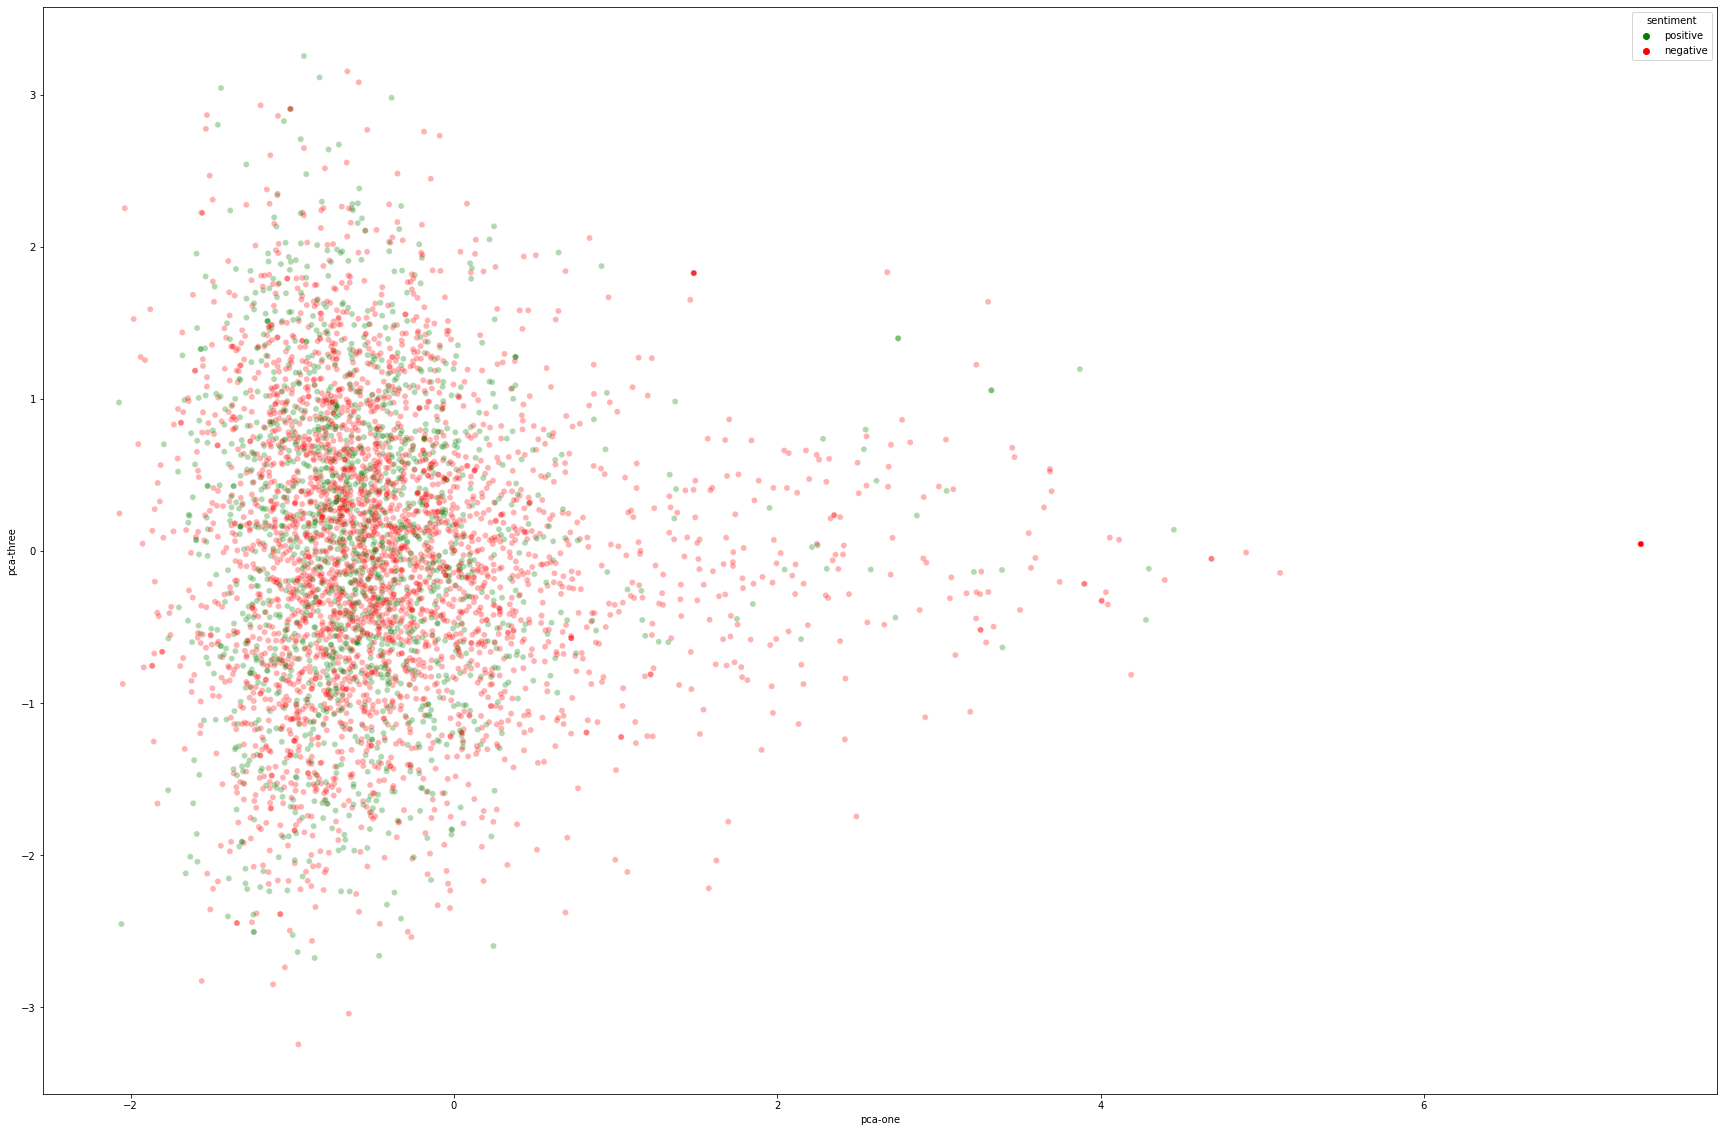

In [ ]:
plt.figure(figsize=(30,20))
palette={"positive":"green","negative":"red"}
sns.scatterplot(
    x="pca-one", y="pca-three",    
    hue="sentiment",
    palette=palette,
    data=df2,
    legend="full",
    alpha=0.3
)
# for i in range(df2.shape[0]):
#   # print(df2.loc[i,"user_name"],df2.loc[i,"pca-one"],df2.loc[i,"pca-three"])
#   plt.annotate( df2.loc[i,"user_name"],xy=(df2.loc[i,"pca-one"],df2.loc[i,"pca-three"]))

# Experiment 1- plot 2: 2D plot obtained in the following section uses the first and second dimensions of the PCA output (PCA used here reduced 768 dimension vectors to 3 dimension vectors)

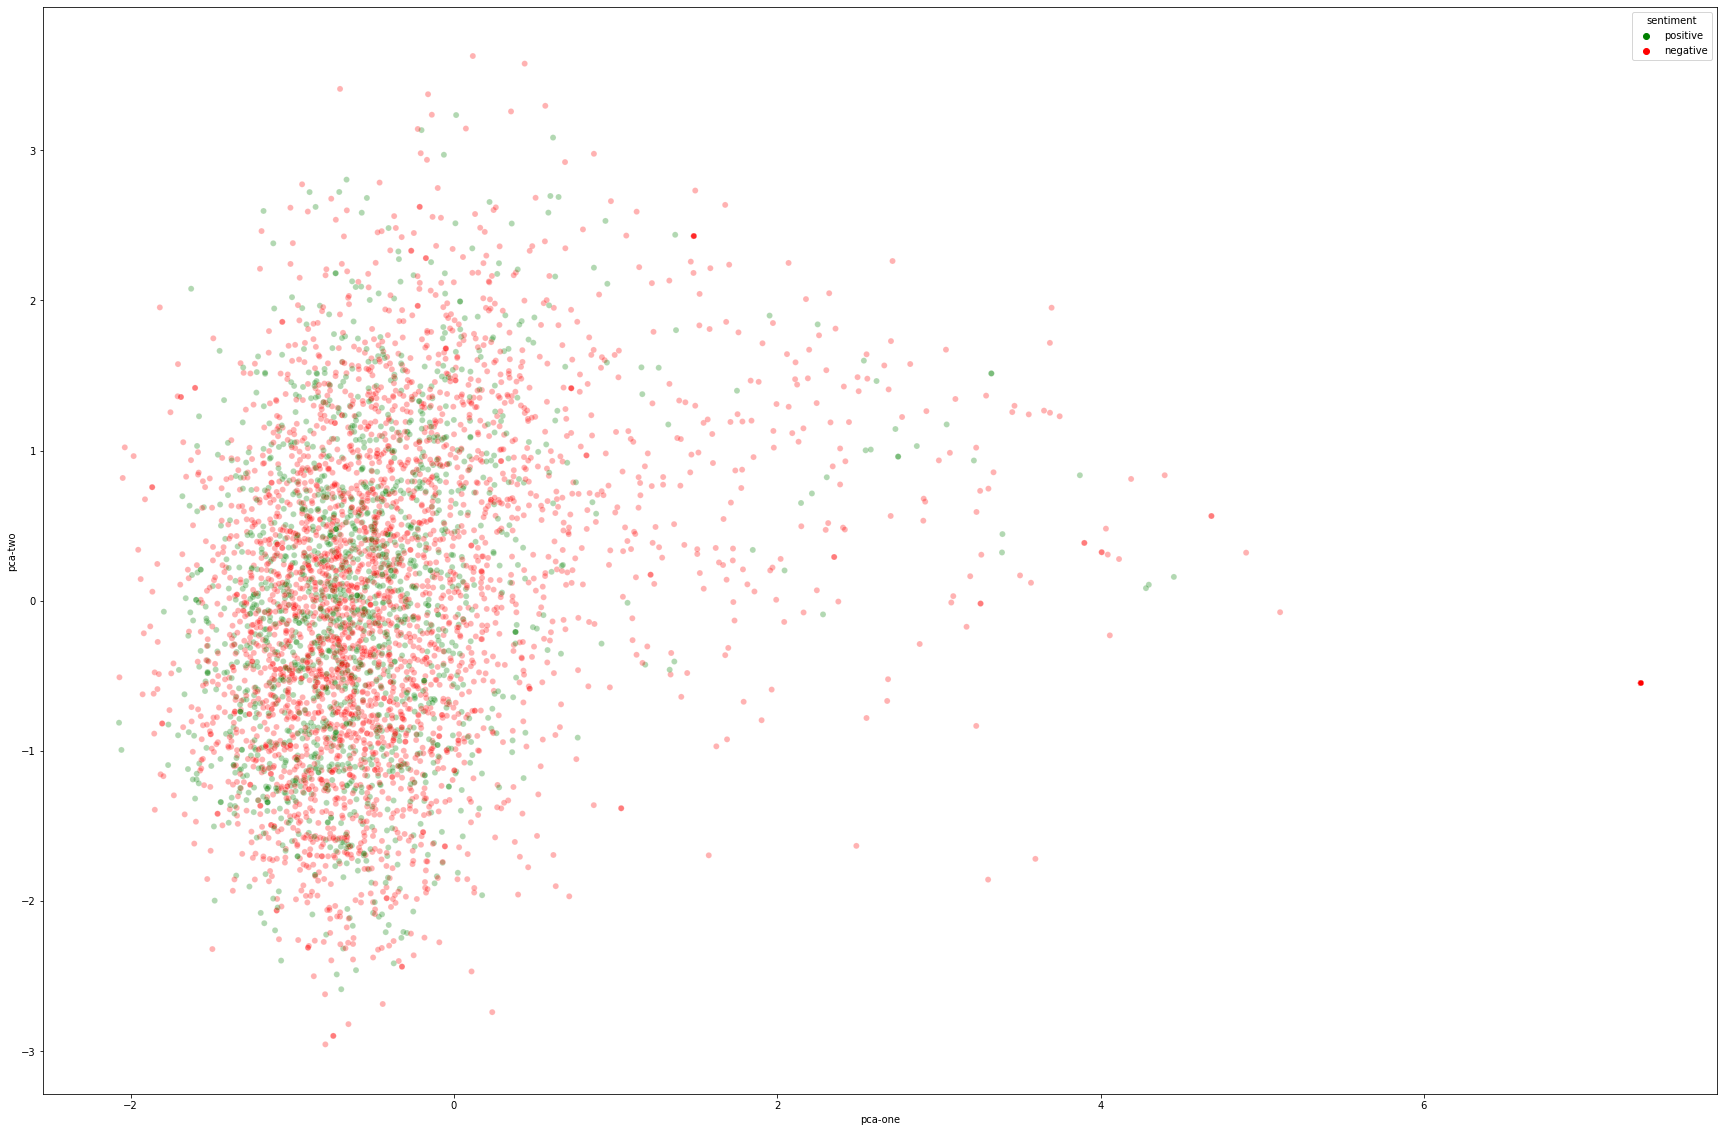

In [ ]:
plt.figure(figsize=(30,20))
palette={"positive":"green","negative":"red"}
sns.scatterplot(
    x="pca-one", y="pca-two", 
    hue="sentiment",
    palette=palette,
    data=df2,
    legend="full",
    alpha=0.3
)

# Experiment 1- plot 3: 2D plot obtained in the following section uses the second and third dimensions of the PCA output (PCA used here reduced 768 dimension vectors to 3 dimension vectors)

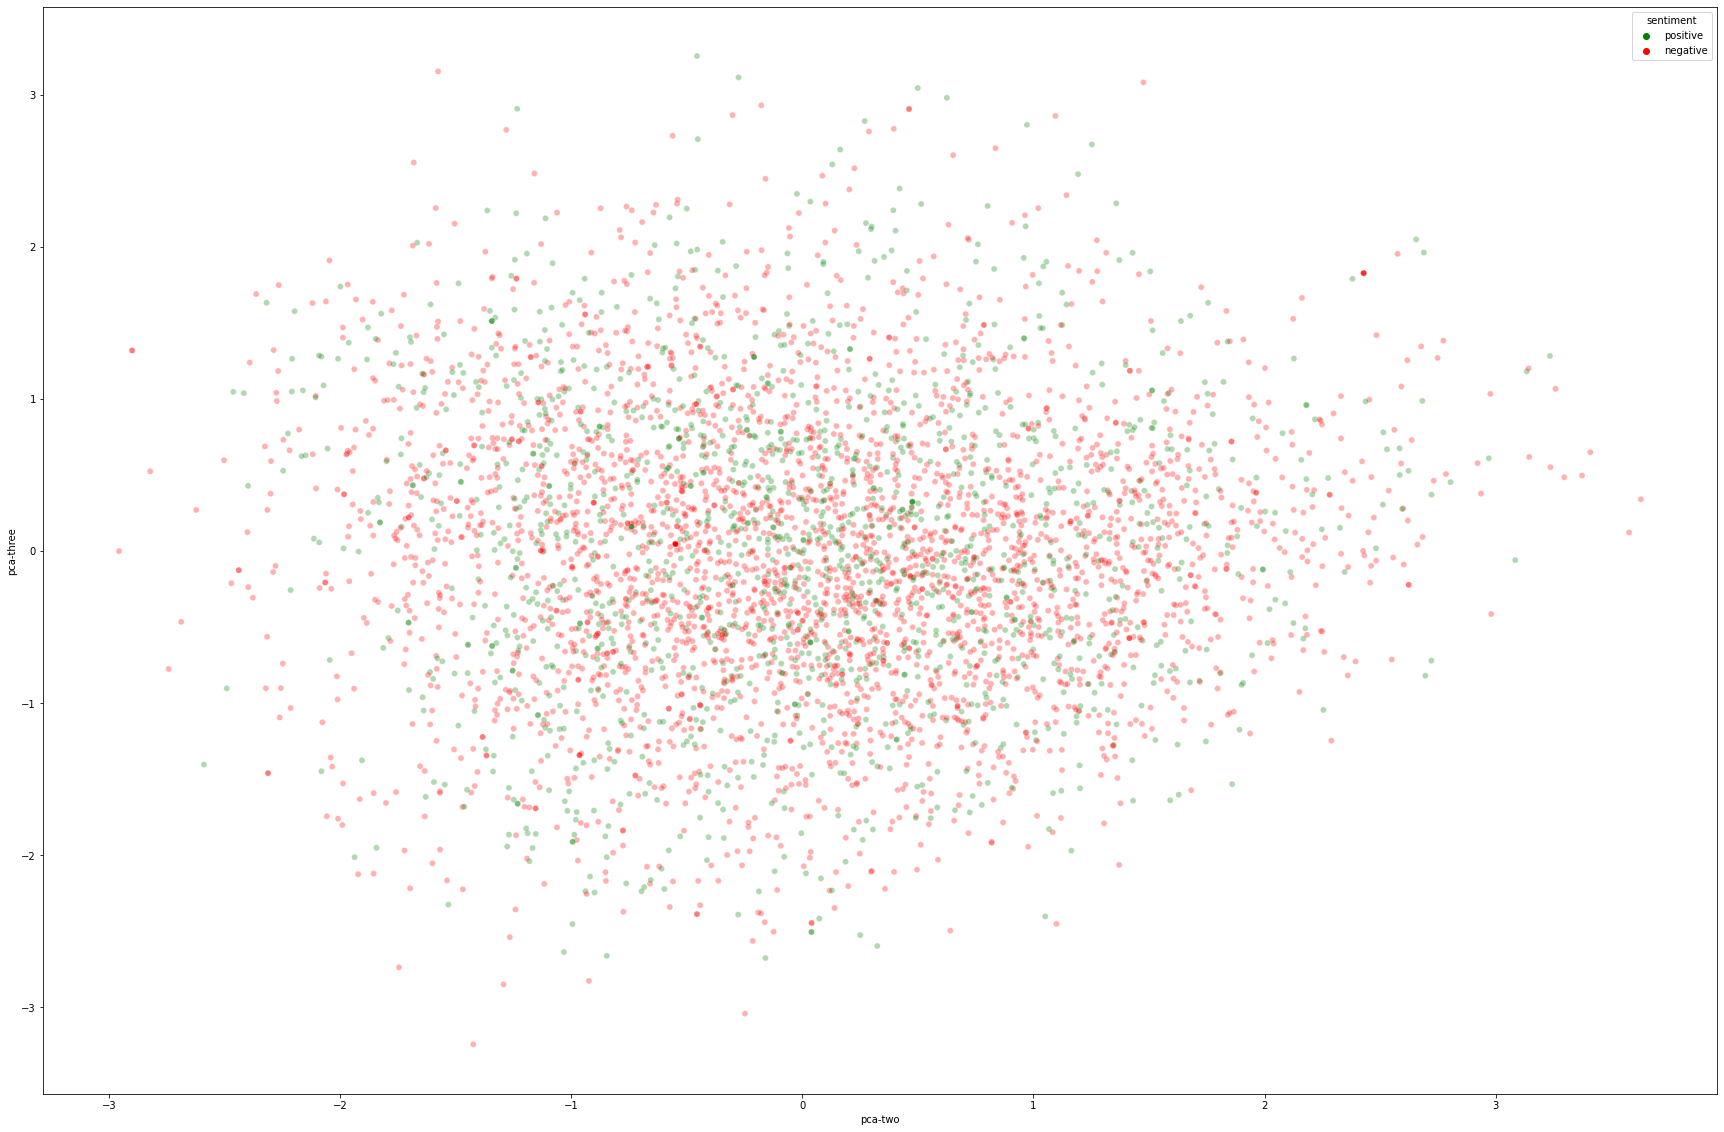

In [ ]:
plt.figure(figsize=(30,20))
sns.scatterplot(
    x="pca-two", y="pca-three",        hue="sentiment",
    palette=palette,
    data=df2,
    legend="full",
    alpha=0.3
)

# Experiment 1- plot 4: 3D plot obtained in the following section uses the first, second, and third dimensions of the PCA output (PCA used here reduced 768 dimension vectors to 3 dimension vectors)

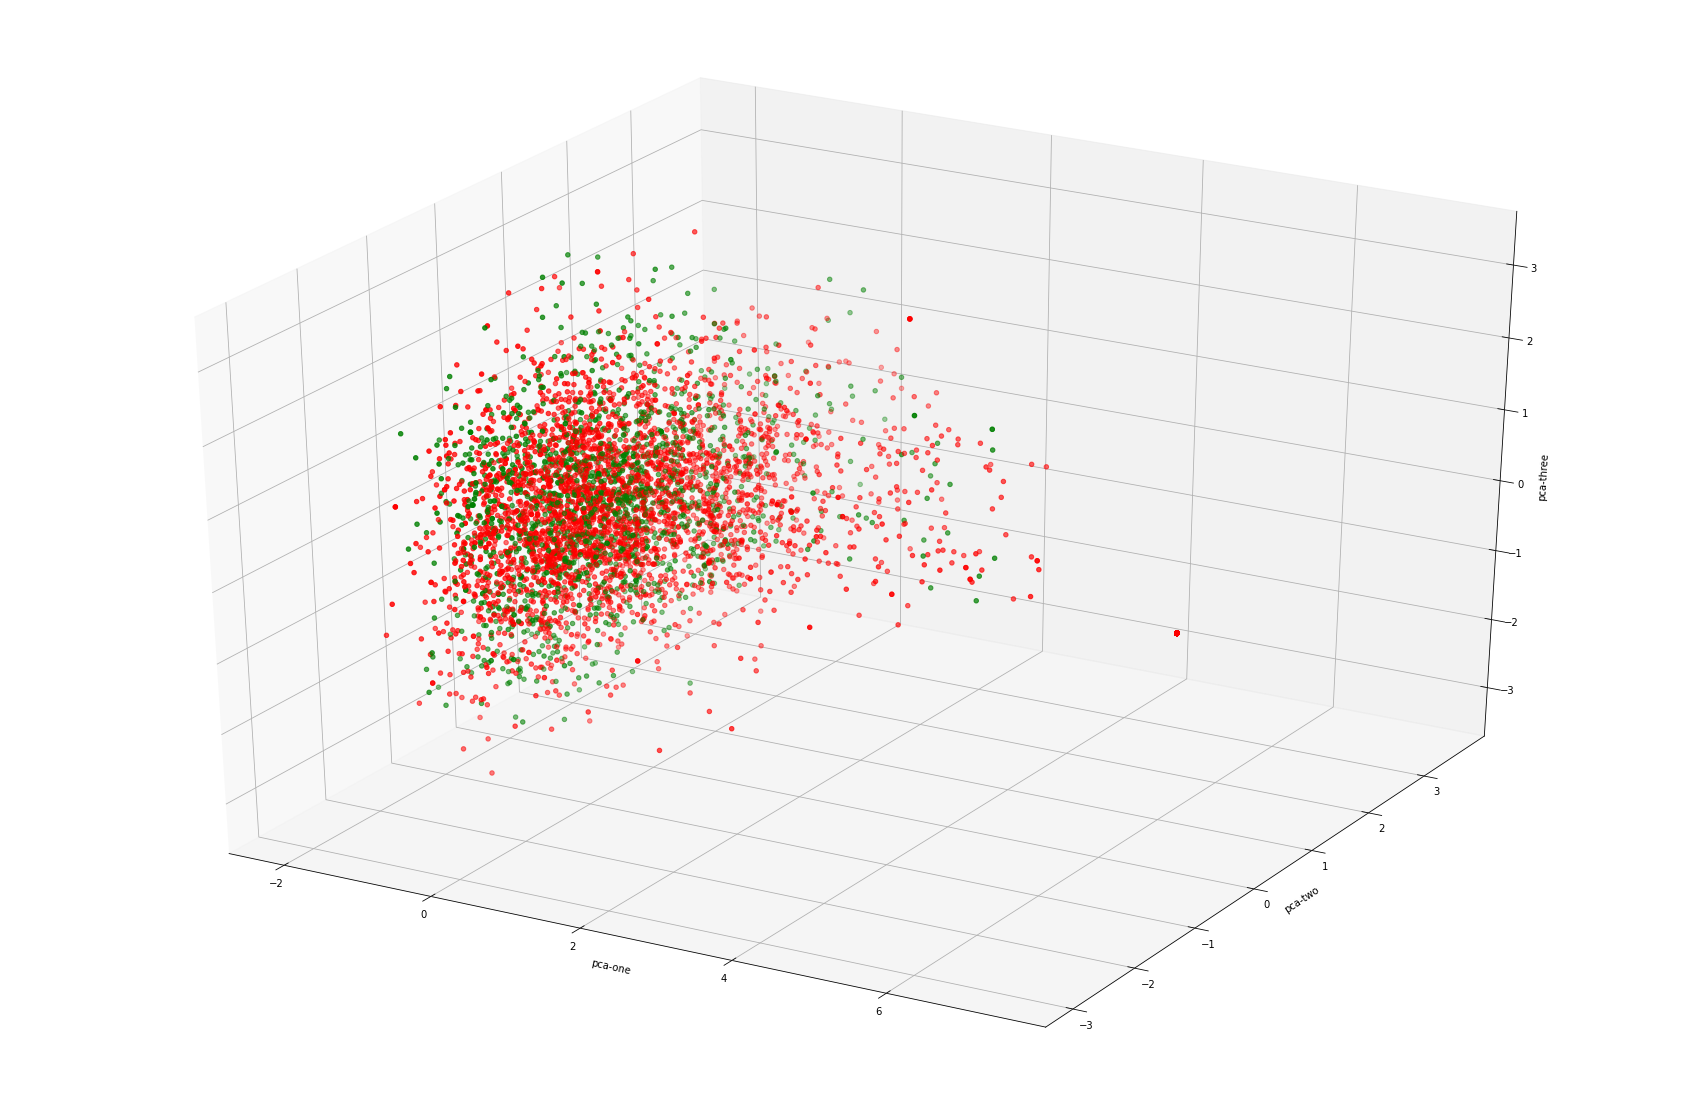

In [ ]:
ax = plt.figure(figsize=(30,20)).gca(projection='3d')
ax.scatter(
    xs=df2["pca-one"], 
    ys=df2["pca-two"], 
    zs=df2["pca-three"],  
    c=df2["color"], 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
"""Executing t-SNE on the vector embeddings"""

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 1.658s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.550835
[t-SNE] KL divergence after 300 iterations: 4.868057
t-SNE done! Time elapsed: 28.30339550971985 seconds


# Experiment 1- plot 5: 2D plot obtained in the following section uses the first and second dimensions of the t-SNE output obtained using the first method described in the answer section above

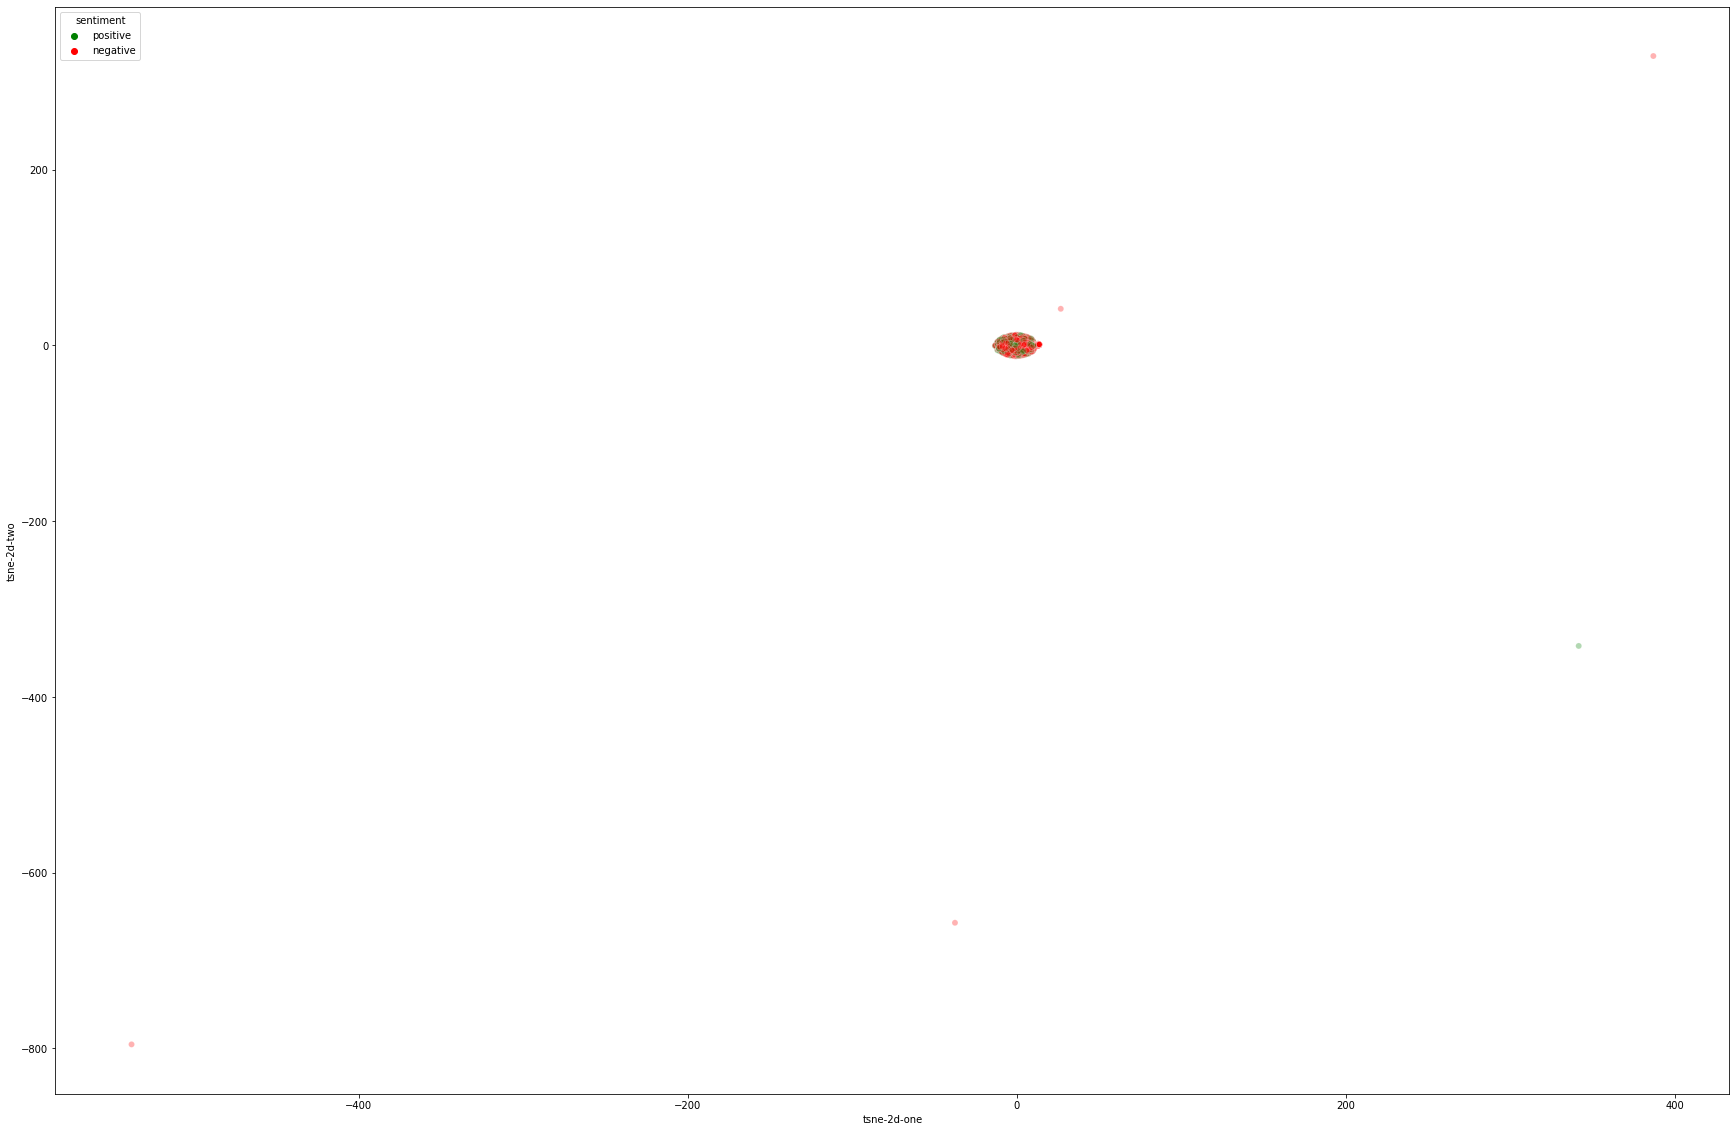

In [ ]:
df2['tsne-2d-one'] = tsne_results[:,0]
df2['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(30,20))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="sentiment",
    palette=palette,
    data=df2,
    legend="full",
    alpha=0.3
)

# Experiment 1- plot 6: 2D plot obtained in the following section uses the first and second dimensions of the t-SNE output obtained using the second method described in the answer section above

Cumulative explained variation for 50 principal components: 0.569025493997919
t-SNE done! Time elapsed: 24.9584858417511 seconds


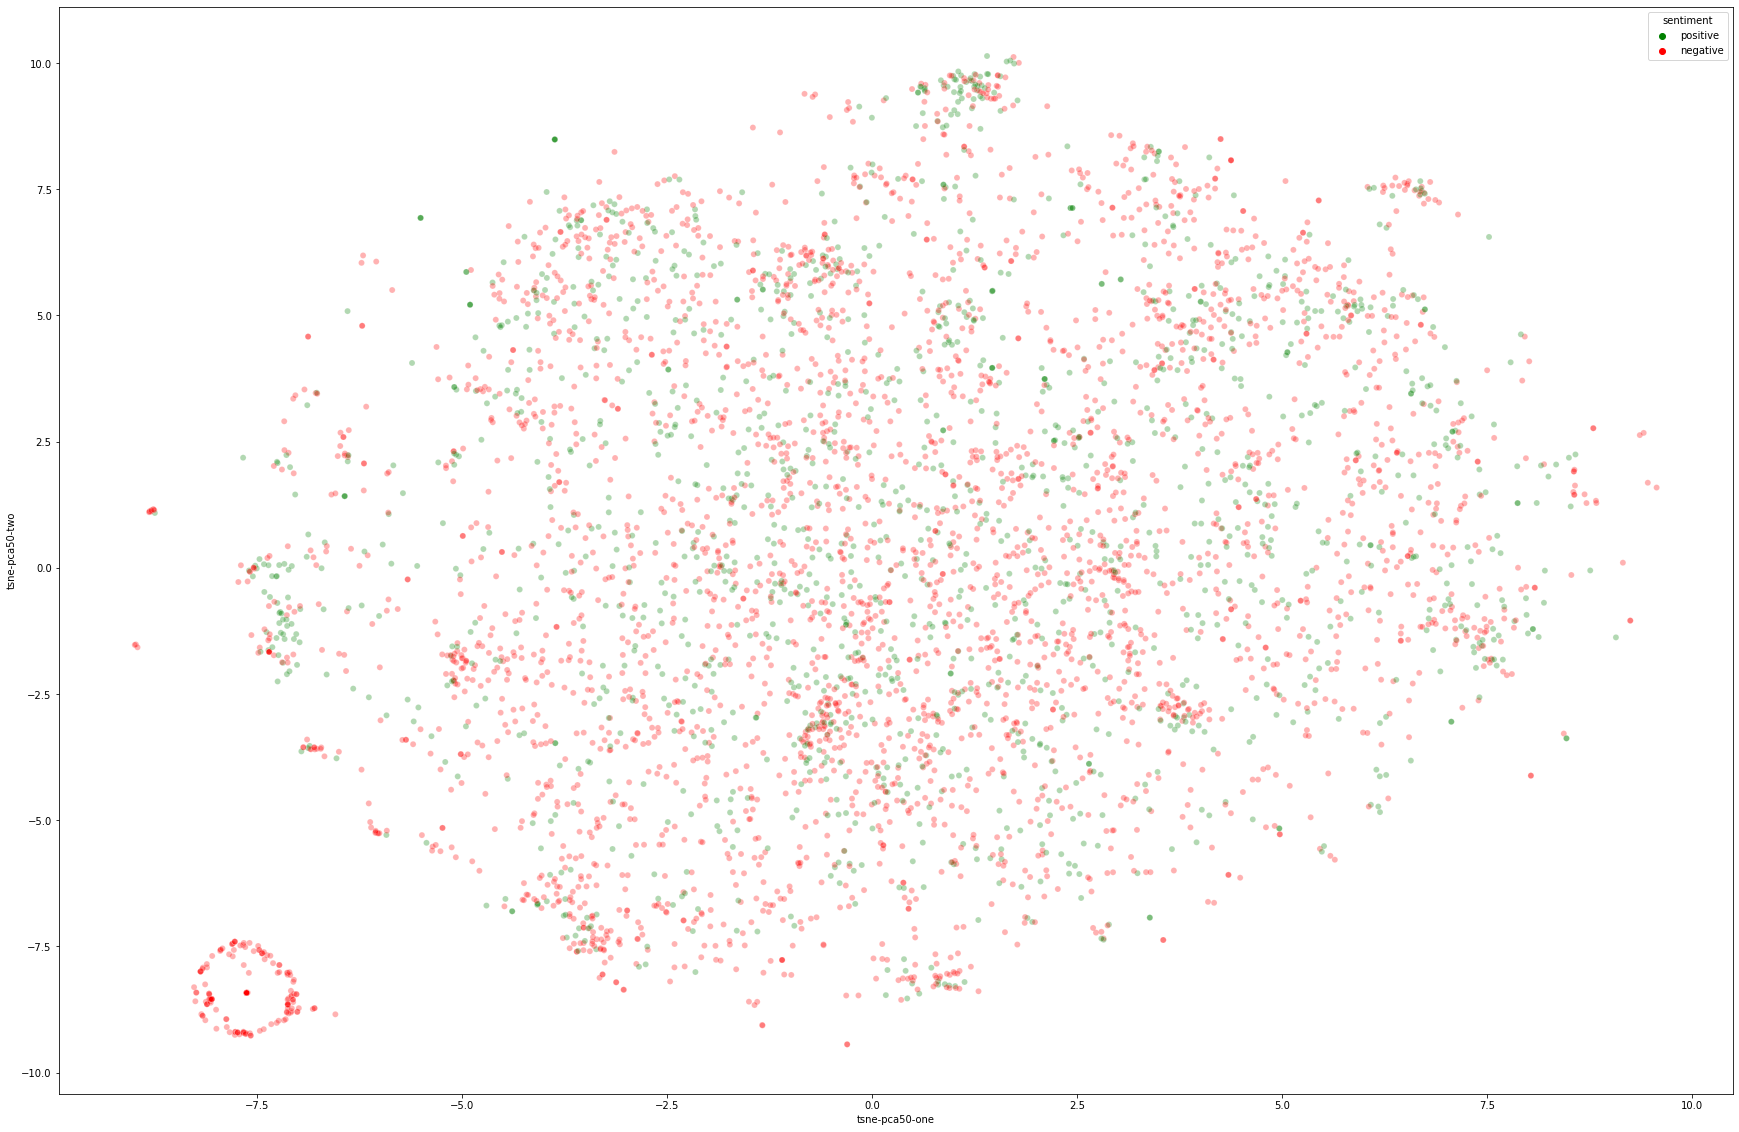

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(embs)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df2['tsne-pca50-one'] = tsne_pca_results[:,0]
df2['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(30,20))

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="sentiment",
    palette=palette,
    data=df2,
    legend="full",
    alpha=0.3,
)

# Experiment 1- plot 7: 3D plot obtained in the following section uses the first, second, and third dimensions of the t-SNE output obtained when reducing dimensions using t-SNE from 768 to 3 dimension vectors. 

t-SNE done! Time elapsed: 110.15510296821594 seconds


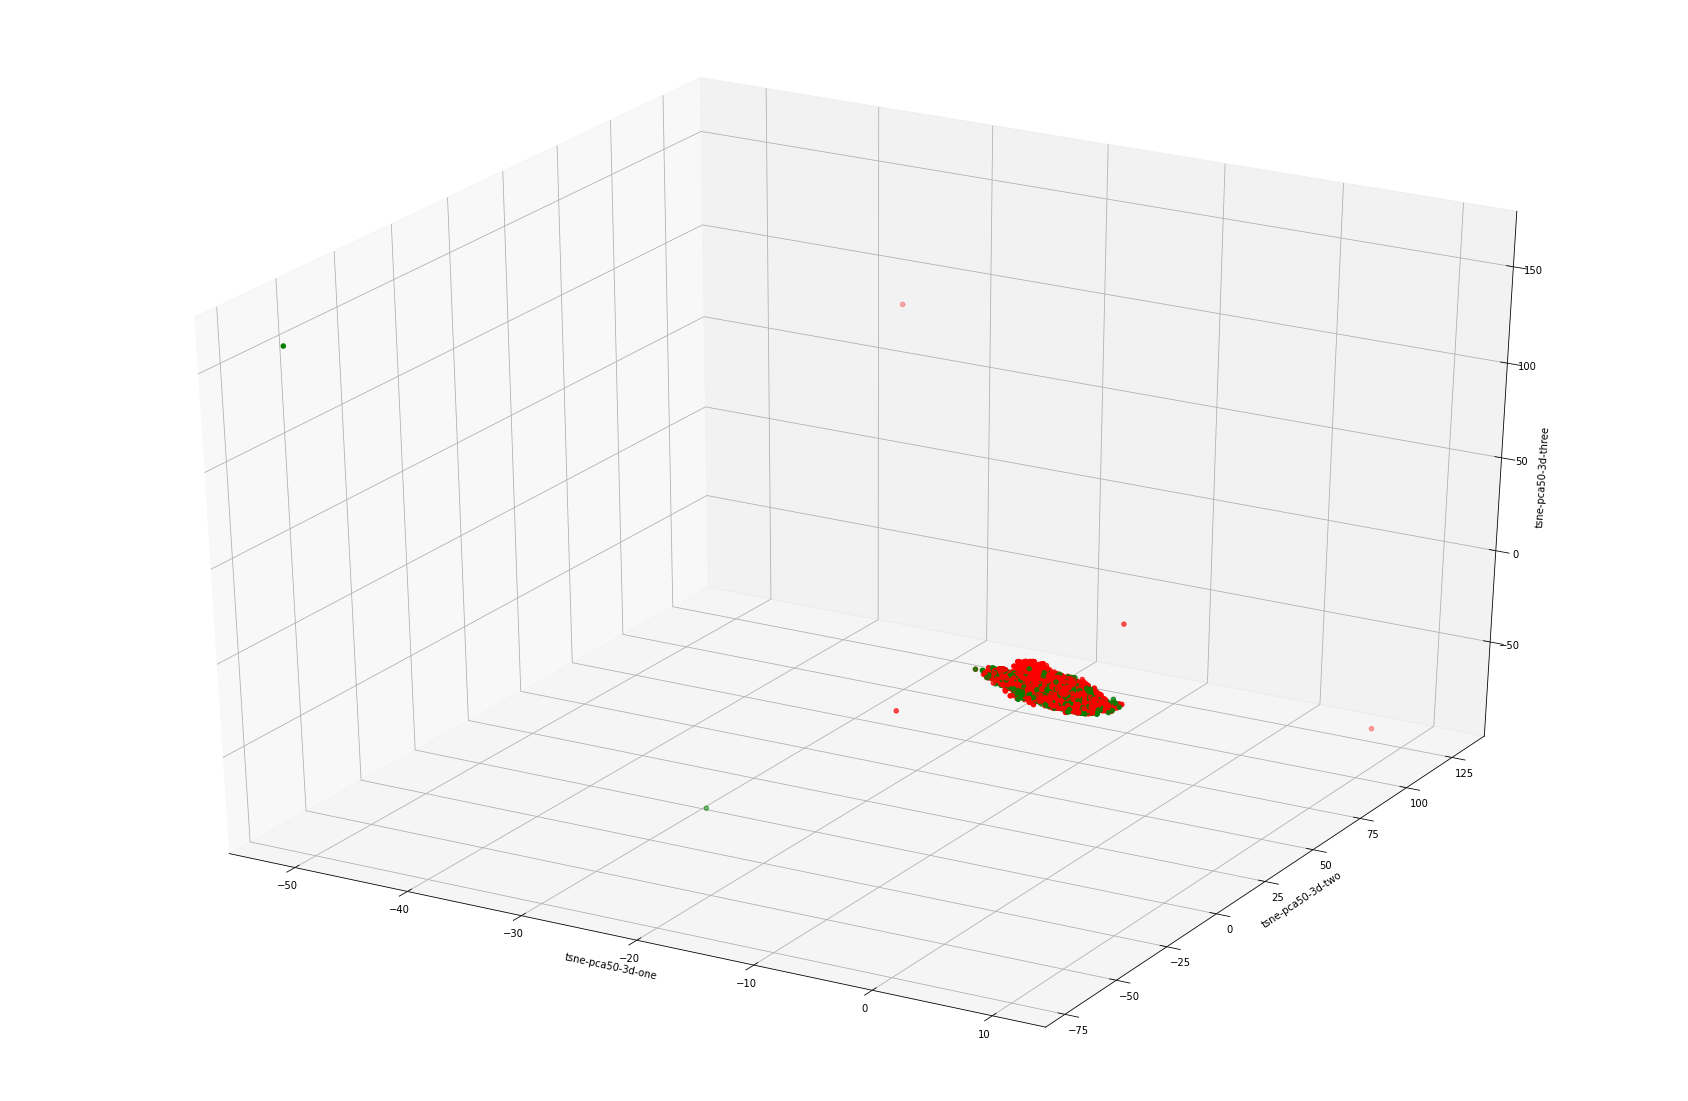

In [ ]:

time_start = time.time()
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results_3d = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df2['tsne-pca50-3d-one'] = tsne_pca_results_3d[:,0]
df2['tsne-pca50-3d-two'] = tsne_pca_results_3d[:,1]
df2['tsne-pca50-3d-three'] = tsne_pca_results_3d[:,2]
ax = plt.figure(figsize=(30,20)).gca(projection='3d')
ax.scatter(
    xs=df2['tsne-pca50-3d-one'], 
    ys=df2['tsne-pca50-3d-two'], 
    zs=df2['tsne-pca50-3d-three'],  
    c=df2["color"], 
)
ax.set_xlabel('tsne-pca50-3d-one')
ax.set_ylabel('tsne-pca50-3d-two')
ax.set_zlabel('tsne-pca50-3d-three')
plt.show()



# Experiment - 2

In [ ]:
congress_members.head()
# congress_ids=congress_members[""]

userid     screen_name
0           776664410   RepCartwright
1           240363117    RepTomMarino
2  837722935095930883  RepScottTaylor
3          1069124515      RepLaMalfa
4  818460870573441028   RepTomGarrett

In [ ]:
"""extracting twitter ids of congress members"""

congress_ids=congress_members["userid"]

In [ ]:
"""Filtering out tweets from congress members"""

df_con=tweets_sample[tweets_sample['user_id'].isin(congress_ids)]

In [ ]:
print(df_con.shape)

(462, 9)


In [ ]:
"""Preprocessing the extracted tweets"""


df_con=df_con[['user_id','user','text']]
df_con = df_con.dropna()
df_con= df_con.reset_index(drop=True)

text_pr = []  

for text in df_con['text']:
  t=re.sub(r'https:\S+', '',   text)
  t=re.sub(r'http:\S+', '',   t)
  t=re.sub(r'@', '',   t)
  t=re.sub(r'RT', '',   t)
  t=re.sub(r':', '',   t)
  t=re.sub(r'"', '',   t)
  t=re.sub('\W+',' ', t )
  t=re.sub("\n", " ", t)
  text_pr.append(t)
    

df_con['text_pr'] = text_pr



user_name = []  

for values in df_con['user']:
   
    user_name.append(re.search(r"'name':(.*),", str(values)).groups()[0])


df_con['user_name'] = user_name

df_con.head()

user_id                                               user  \
0  2.853309e+09  {'created_at': '2014-10-31T14:01:43.000Z', 'fo...   
1  5.849123e+08  {'created_at': '2012-05-19T16:41:06.000Z', 'fo...   
2  1.221740e+08  {'created_at': '2010-03-11T21:05:31.000Z', 'fo...   
3  1.074101e+09  {'created_at': '2013-01-09T15:30:38.000Z', 'fo...   
4  2.115309e+08  {'created_at': '2010-11-03T14:33:04.000Z', 'fo...   

                                                text  \
0  As a former member of the School Board, the fa...   
1  “Pay attention, Democrats. Watch what Republic...   
2  Thank you @BBCRadio4 for having me on today's ...   
3  Today is #NationalManufacturingDay &amp; there...   
4  RT @CHPA: Thank you to @RepBillJohnson and @Do...   

                                             text_pr               user_name  
0  As a former member of the School Board the fat...   'Rep. Carlos Curbelo'  
1   Pay attention Democrats Watch what Republican...       'Lacy Clay MO1st'  
2  Thank you BBCRadio4 for having me on today s s...            'Dina Titus'  
3  Today is NationalManufacturingDay amp there ar...       'Susan W. Brooks'  
4   CHPA Thank you to RepBillJohnson and DorisMat...          'Bill Johnson'

In [ ]:

"""Computing embeddings of the sentences"""


embs = []  
sent=[]
k=0
color=[]
for text in df_con['text_pr']:
    res = TextBlob(text)

    sent.append("positive" if res.sentiment.polarity>0 else "negative")
    embs.append(np.array(model.encode(text)))
    color.append("green" if res.sentiment.polarity>0 else "red")


df_con['embeddings'] = embs
df_con['sentiment'] = sent
df_con['color'] = color
df_con.head()

user_id                                               user  \
0  2.853309e+09  {'created_at': '2014-10-31T14:01:43.000Z', 'fo...   
1  5.849123e+08  {'created_at': '2012-05-19T16:41:06.000Z', 'fo...   
2  1.221740e+08  {'created_at': '2010-03-11T21:05:31.000Z', 'fo...   
3  1.074101e+09  {'created_at': '2013-01-09T15:30:38.000Z', 'fo...   
4  2.115309e+08  {'created_at': '2010-11-03T14:33:04.000Z', 'fo...   

                                                text  \
0  As a former member of the School Board, the fa...   
1  “Pay attention, Democrats. Watch what Republic...   
2  Thank you @BBCRadio4 for having me on today's ...   
3  Today is #NationalManufacturingDay &amp; there...   
4  RT @CHPA: Thank you to @RepBillJohnson and @Do...   

                                             text_pr               user_name  \
0  As a former member of the School Board the fat...   'Rep. Carlos Curbelo'   
1   Pay attention Democrats Watch what Republican...       'Lacy Clay MO1st'   
2  Thank you BBCRadio4 for having me on today s s...            'Dina Titus'   
3  Today is NationalManufacturingDay amp there ar...       'Susan W. Brooks'   
4   CHPA Thank you to RepBillJohnson and DorisMat...          'Bill Johnson'   

                                          embeddings sentiment  color  
0  [-0.17495164, 0.46640137, -0.1268976, 0.415960...  positive  green  
1  [-0.08328853, -0.13068259, 0.03793164, -0.0872...  negative    red  
2  [0.14940132, 0.32206586, -0.09952547, -0.06639...  negative    red  
3  [0.02033107, 0.25936496, -0.08144096, -0.11931...  positive  green  
4  [-0.0012000588, 0.2898705, -0.22939347, -0.144...  positive  green

In [ ]:
df_con.shape

(462, 8)

# Experiment 2 - Plot 1: 2D plots obtained using the first and second dimension of PCA output after reducing the dimensions from 768 to 3 dimension vectors for finding clusters in congress member tweets. Using k-means for showing clusters

Explained variation per principal component: [0.03062486 0.02835152 0.02670722]
462


Text(0.8271442285574377, -0.05782956501783206, 'Centroid 2')

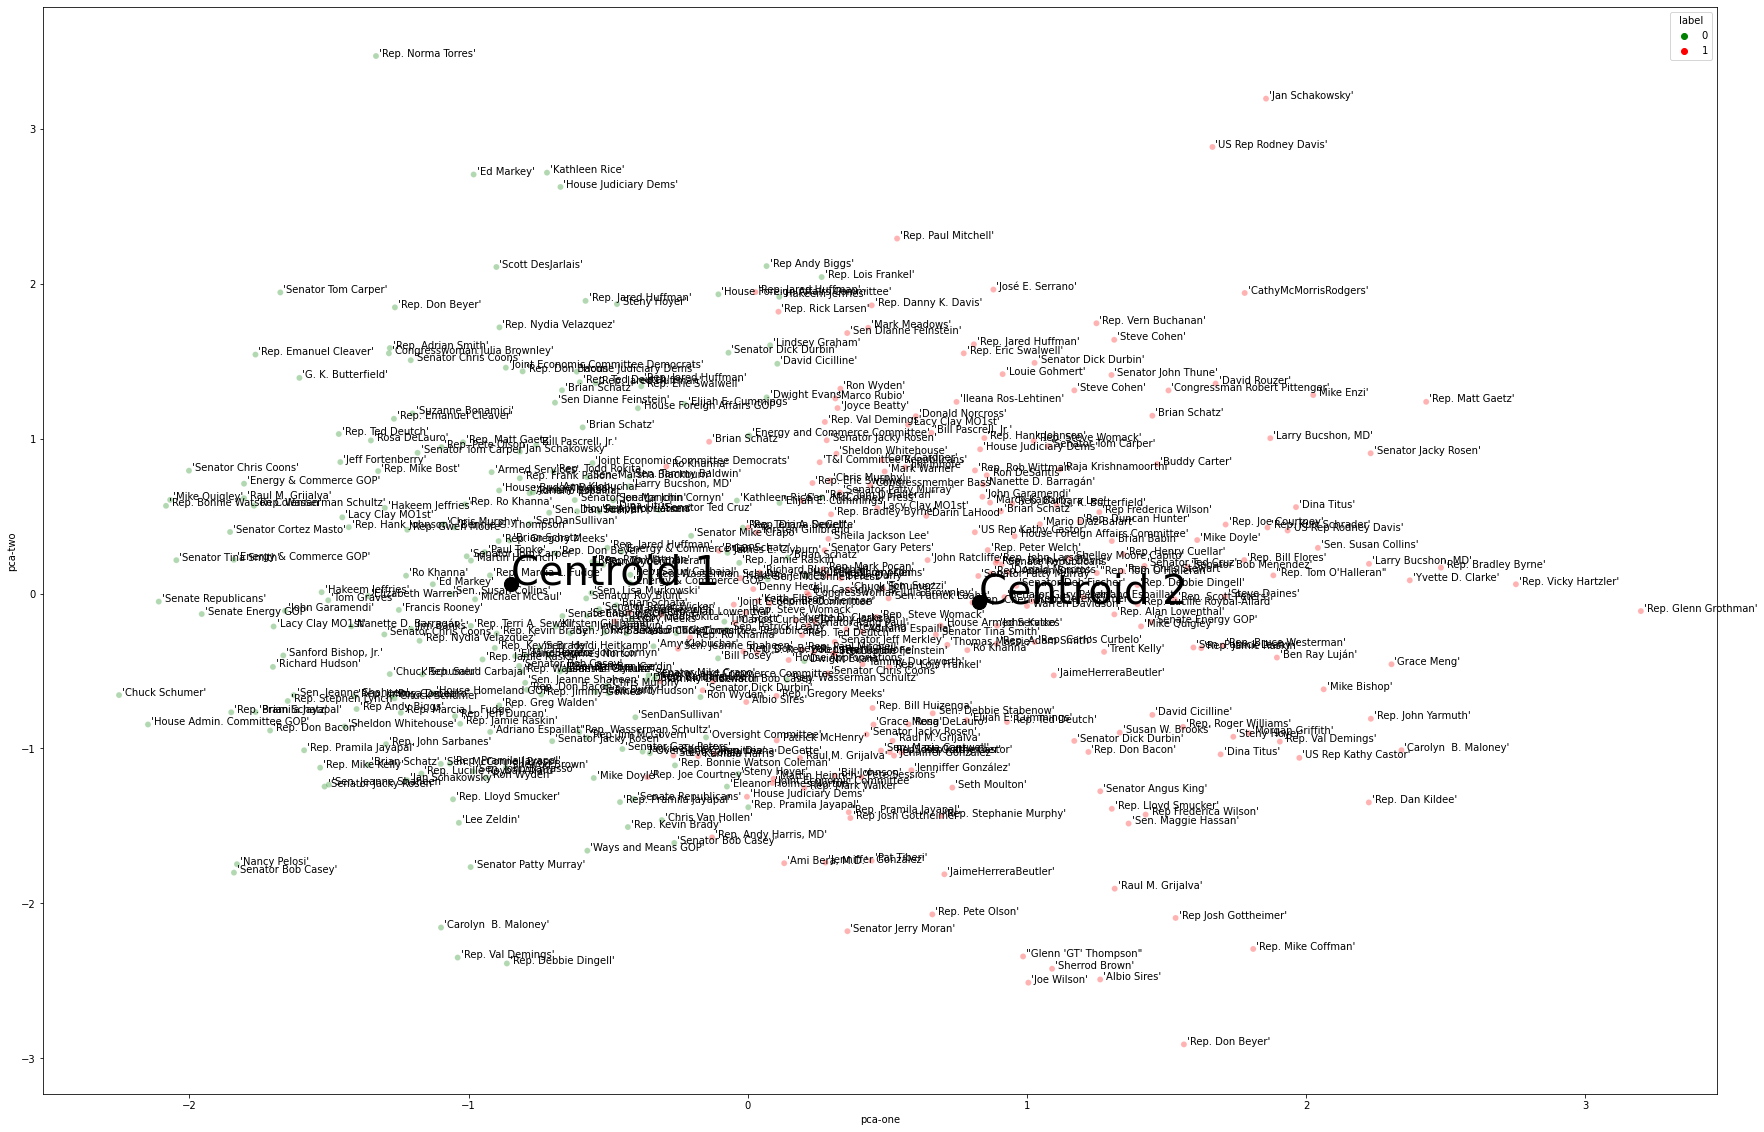

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embs)
df_con['pca-one'] = pca_result[:,0]
df_con['pca-two'] = pca_result[:,1] 
df_con['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


print(df_con.shape[0])
indices=range(df_con.shape[0])
df_con.index=indices
# df2.set_index("index")
df_con.head()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 2)
 
label = kmeans.fit_predict(pca_result)
df_con["label"]=label
labels={0:"green", 1:"red"}

centroids = kmeans.cluster_centers_


col=[]
for value in df_con["label"]:
  if value==0:
    col.append("green")
  else:
    col.append("red")

df_con["col"]=col

plt.figure(figsize=(30,20))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=labels,
    data=df_con,
    legend="full",
    alpha=0.3
)

for i in range(df_con.shape[0]):
  # print(df2.loc[i,"user_name"],df2.loc[i,"pca-one"],df2.loc[i,"pca-three"])
  plt.annotate( df_con.loc[i,"user_name"],xy=(df_con.loc[i,"pca-one"],df_con.loc[i,"pca-two"]))
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'k')
plt.text(centroids[0,0],centroids[0,1]  ,'%s' % ("Centroid 1"), size=40, zorder=1, color='k')
plt.text(centroids[1,0],centroids[1,1] , '%s' % ("Centroid 2"), size=40, zorder=1, color='k')

# Experiment 2 - Plot 2: 3D plots obtained using the first, second, and third dimension of PCA output after reducing the dimensions from 768 to 3 dimension vectors for finding clusters in congress member tweets. Using k-means for showing clusters

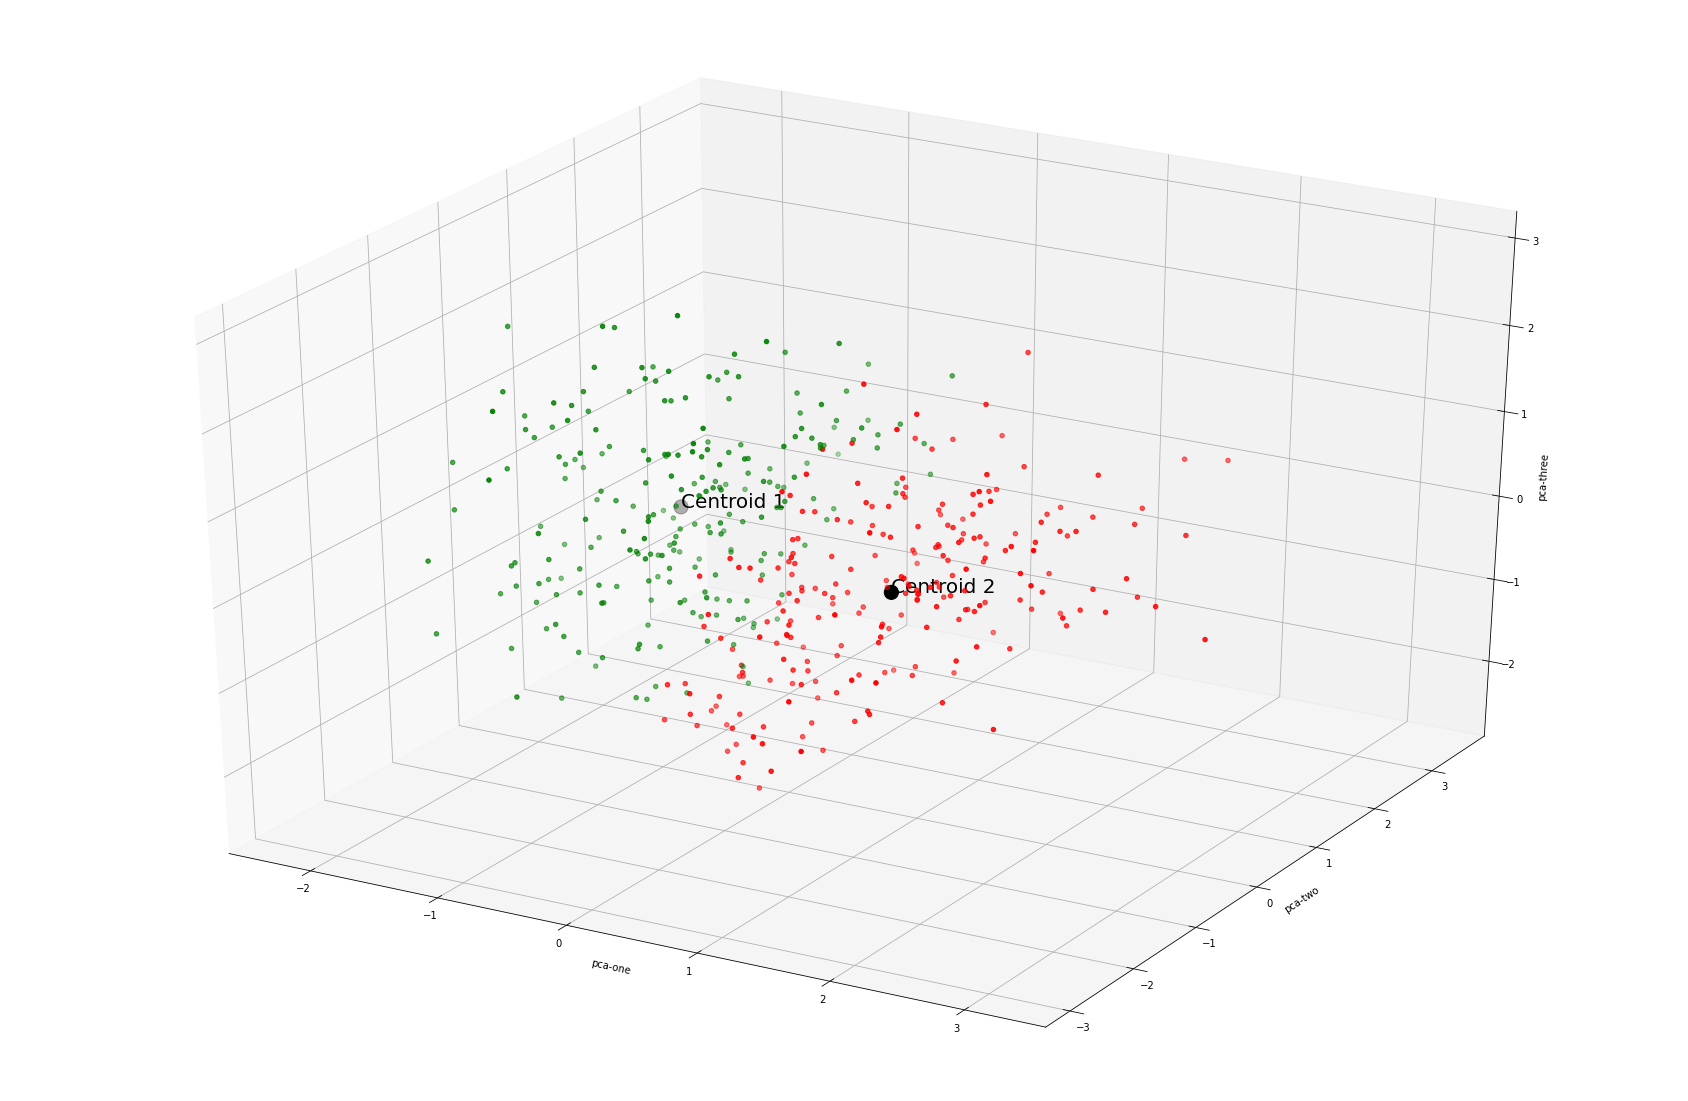

In [ ]:
ax = plt.figure(figsize=(30,20)).gca(projection='3d')
ax.scatter(
    xs=df_con["pca-one"], 
    ys=df_con["pca-two"], 
    zs=df_con["pca-three"], 
    c=df_con["col"],  
)
ax.scatter(xs=centroids[:,0] , ys=centroids[:,1], zs=centroids[:,2], s = 200, c = 'k')
ax.text(centroids[0,0],centroids[0,1],centroids[0,2],  '%s' % ("Centroid 1"), size=20, zorder=1, color='k')
ax.text(centroids[1,0],centroids[1,1],centroids[1,2],  '%s' % ("Centroid 2"), size=20, zorder=1, color='k')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# Experiment 2 - Plot 3: 2D plots obtained using the first, second dimension of t-SNE output after reducing the dimensions from 768 to 2 dimension vectors for finding clusters in congress member tweets. Using k-means for showing clusters

Cumulative explained variation for 50 principal components: 0.40286278986636503
t-SNE done! Time elapsed: 1.4051499366760254 seconds


Text(-1.092429, -5.7216883, 'Centroid 2')

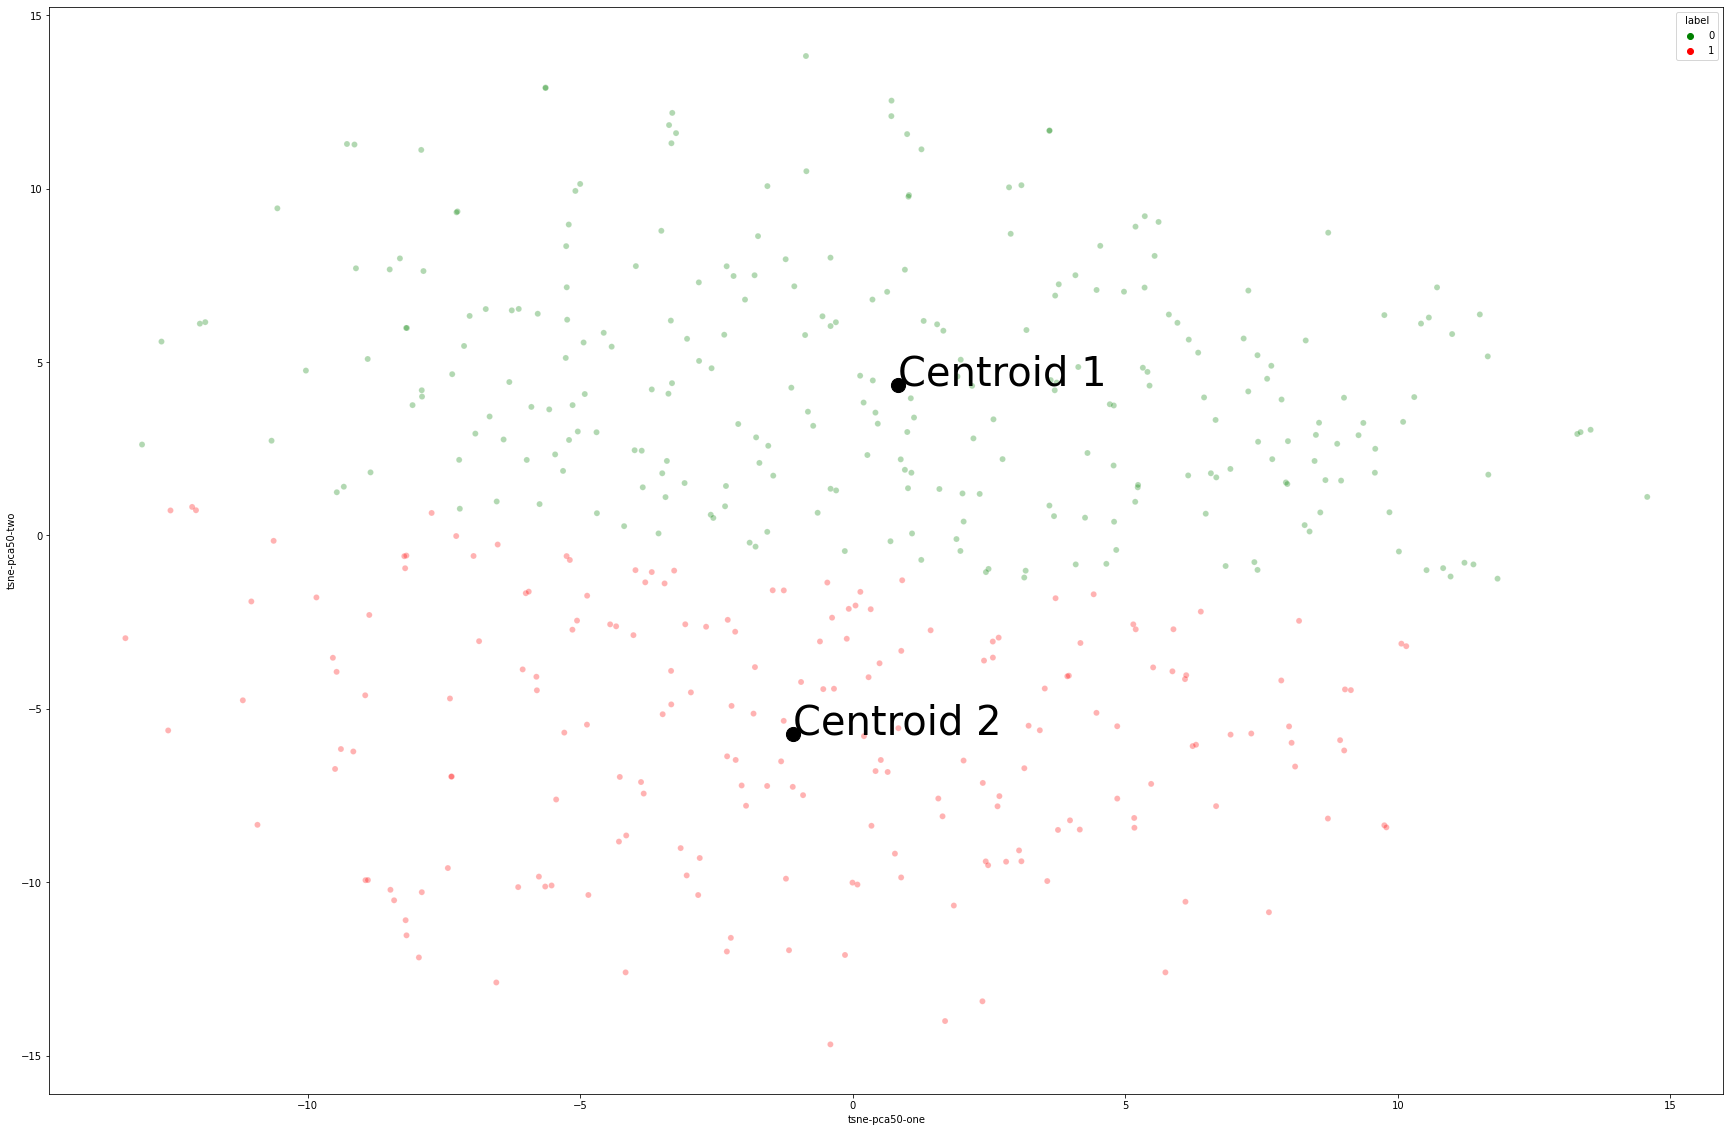

In [ ]:



pca_50 = PCA(n_components=25)
pca_result_50 = pca_50.fit_transform(embs)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_con['tsne-pca50-one'] = tsne_pca_results[:,0]
df_con['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(30,20))


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 2)
 
label = kmeans.fit_predict(tsne_pca_results)
df_con["label"]=label
labels={0:"green", 1:"red"}
centroids = kmeans.cluster_centers_

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=labels,
    data=df_con,
    legend="full",
    alpha=0.3,
)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'k')
plt.text(centroids[0,0],centroids[0,1]  ,'%s' % ("Centroid 1"), size=40, zorder=1, color='k')
plt.text(centroids[1,0],centroids[1,1] , '%s' % ("Centroid 2"), size=40, zorder=1, color='k')

In [ ]:
# !pip install pyspark
# !pip install graphframes
# !pip install -U -q PyDrive
# !apt install openjdk-8-jdk-headless -qq
# !curl -L -o "/usr/local/lib/python3.7/dist-packages/pyspark/jars/graphframes-0.8.1-spark3.0-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# !mkdir us-congress-tweets
# !wget https://us-congress.s3.amazonaws.com/congress_members.csv -O us-congress-tweets/congress_members.csv
# !wget https://us-congress.s3.amazonaws.com/tweets-sample-400k.json -O us-congress-tweets/tweets-sample-400k.json
# !wget https://us-congress.s3.amazonaws.com/user_hashtags-1m.csv -O us-congress-tweets/user_hashtags-1m.csv
# !wget https://us-congress.s3.amazonaws.com/user_mentions.csv -O us-congress-tweets/user_mentions.csv

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# import pyspark
# from pyspark.sql import *
# from pyspark.sql.types import *
# from pyspark import SparkContext, SparkConf

# # create a Spark session
# # conf = SparkConf().set("spark.ui.port", "4050")

# conf=conf = SparkConf().conf = SparkConf().set("spark.ui.port", "4050").set("spark.executor.memory", "30g").set("spark.driver.memory", "8g")
# # create a Spark context
# sc = pyspark.SparkContext(conf=conf)
# spark = SparkSession.builder.getOrCreate()

In [ ]:
# congress_members = spark.read.csv("us-congress-tweets/congress_members.csv", header=True)

# from pyspark.sql.types import *
# import pyspark.sql.functions as F
# twitter_date_format="EEE MMM dd HH:mm:ss ZZZZZ yyyy"

# user_schema = StructType([
#     StructField('created_at', TimestampType(), True),
#     StructField('followers_count', LongType(), True),
#     StructField('id', LongType(), True),
#     StructField('name', StringType(), True),
#     StructField('screen_name', StringType(), True)
# ])

# hashtag_schema = ArrayType(StructType([StructField('text', StringType(), True)]))
# user_mentions_schema = ArrayType(StructType([StructField('id', LongType(), True),
#                                              StructField('screen_name', StringType(), True)]))
# entities_schema = StructType([
#     StructField('hashtags', hashtag_schema, True),
#     StructField('user_mentions', user_mentions_schema, True)
#     ])

# retweeted_status_schema =StructType([        
#         StructField("id", LongType(), True),
#         StructField("in_reply_to_user_id", LongType(), True),
#         StructField("in_reply_to_status_id", LongType(), True),
#         StructField("created_at", TimestampType(), True),
#         StructField("user", user_schema)
#     ])

# tweet_schema =StructType([
#         StructField("text", StringType(), True),
#         StructField("id", LongType(), True),
#         StructField("in_reply_to_user_id", LongType(), True),
#         StructField("in_reply_to_status_id", LongType(), True),
#         StructField("created_at", TimestampType(), True),
#         StructField("user", user_schema),
#         StructField("entities", entities_schema),
#         StructField("retweeted_status", retweeted_status_schema)
#     ])


# tweets = spark.read.option("timestampFormat", twitter_date_format)\
#                    .json('us-congress-tweets/tweets-sample-400k.json', tweet_schema)\
#                    .withColumn('user_id',F.col('user.id'))
# tweets.printSchema()

# Experiment 3

In [ ]:
!pip install nltk

In [ ]:
import nltk
from gensim.models import word2vec
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
"""Preprocessing the tweets, removing stop words, and extracting the remaining words"""


STOP_WORDS = nltk.corpus.stopwords.words()
text_n=[]
for text in df['text']:
  t=re.sub(r'https:\S+', '',   text)
  t=re.sub(r'http:\S+', '',   t)
  t=re.sub(r'@', '',   t)
  t=re.sub(r'RT', '',   t)
  t=re.sub(r':', '',   t)
  t=re.sub(r'"', '',   t)
  t=re.sub('\W+',' ', t )
  t=re.sub("\n", " ", t)
  reg = re.compile('([^\s\w]|_)+')
  sent = reg.sub('', t).lower()
  sent = sent.split(" ")
  
  for word in list(sent):
      if word in STOP_WORDS:
          sent.remove(word)  
          
  sent = " ".join(sent)
  text_n.append(sent)
  


df['text_nostop'] = text_n

In [ ]:
df.head()

user  \
0  {'created_at': '2017-03-22T03:11:54.000Z', 'fo...   
1  {'created_at': '2016-01-29T01:49:38.000Z', 'fo...   
2  {'created_at': '2016-09-10T05:42:53.000Z', 'fo...   
3  {'created_at': '2012-11-17T11:39:10.000Z', 'fo...   
4  {'created_at': '2009-01-19T12:16:31.000Z', 'fo...   

                                                text           user_name  \
0  RT @maddow: "I hear a lot about about lack of ...             'Quazy'   
1  @ChuckGrassley @SenateMajLdr It's time for you...   'cookiesparadiso'   
2  RT @cm_merlin: @funder @JeffFlake @lisamurkows...     'putins_puppet'   
3  RT @SenJeffMerkley: I read the FBI report.  Th...          'cmhorton'   
4  RT @SenJeffMerkley: I read the FBI report.  Th...        'Philipsgma'   

                                             text_pr  \
0   I hear a lot about about lack of corroboratio...   
1   It s time for you to leave Congress amp let t...   
2   Kavanaugh disqualified himself with perjury a...   
3   I read the FBI report This whole thing is a s...   
4   I read the FBI report This whole thing is a s...   

                                         text_nostop  
0   maddow hear lot lack corroboration know get c...  
1  chuckgrassley senatemajldr time leave congress...  
2   cmmerlin funder jeffflake lisamurkowski senat...  
3   senjeffmerkley read fbi report whole thing sh...  
4   senjeffmerkley read fbi report whole thing sh...

In [ ]:
"""generating a corpus of all the words"""

def generate_corpus(data):
    
    corpus = []
    for sent in data['text_nostop']:
        w_l = sent.strip().split(" ")
        corpus.append(w_l)
            
    return corpus

corpus = generate_corpus(df)        


In [ ]:
corpus[:5]

[['maddow',
  'hear',
  'lot',
  'lack',
  'corroboration',
  'know',
  'get',
  'corroboration',
  'talk',
  'corroborating',
  'witne'],
 ['chuckgrassley',
  'senatemajldr',
  'time',
  'leave',
  'congress',
  'amp',
  'let',
  'country',
  'heal',
  'damage'],
 ['cmmerlin',
  'funder',
  'jeffflake',
  'lisamurkowski',
  'senatorcollins',
  'kavanaugh',
  'disqualified',
  'perjury',
  'amp',
  'bias',
  'entire',
  'world',
  'saw'],
 ['senjeffmerkley',
  'read',
  'fbi',
  'report',
  'whole',
  'thing',
  'sham',
  'stunted',
  'strangled',
  'investigation',
  'designed',
  'provide',
  'cove'],
 ['senjeffmerkley',
  'read',
  'fbi',
  'report',
  'whole',
  'thing',
  'sham',
  'stunted',
  'strangled',
  'investigation',
  'designed',
  'provide',
  'cove']]

In [ ]:

"""Creating the word2vec model"""

model = word2vec.Word2Vec(corpus, size=500, window=40, min_count=200, workers=8)

In [ ]:
"""Showing vector embedding for a particular word"""

model["realdonaldtrump"]


array([-2.92852223e-01, -6.63693100e-02, -4.61072415e-01, -6.62357986e-01,
       -4.86831158e-01, -7.20826805e-01,  6.47568941e-01, -2.17207730e-01,
       -5.79180241e-01, -7.29926452e-02,  5.13267517e-01,  1.06674649e-01,
       -1.79110289e-01,  7.70854533e-01, -2.80663878e-01, -3.68342102e-02,
       -1.43872544e-01,  7.98031762e-02,  6.00736558e-01,  7.87536502e-01,
       -2.14604244e-01, -1.60809696e-01,  6.50066793e-01,  6.07722342e-01,
        1.82267860e-01, -2.45655790e-01, -3.49343061e-01,  9.58233848e-02,
       -7.25564640e-03,  6.73192024e-01, -4.46699671e-02, -6.17803812e-01,
       -2.50674695e-01, -8.49488616e-01, -8.59776139e-01, -2.14377984e-01,
       -4.52401549e-01,  4.08503354e-01, -3.85901004e-01, -1.99954182e-01,
       -2.32601419e-01,  8.16495642e-02,  2.80899882e-01,  2.42493048e-01,
        4.60136473e-01,  6.96172893e-01,  3.21397325e-03,  1.99169308e-01,
       -9.42263842e-01, -1.60055709e+00,  3.37483853e-01, -2.13257432e-01,
       -6.18500598e-02,  

In [ ]:
"""defining the function to plot graphs based on the tsne output of all the word vector embeddings"""


def tsne(model):
    
    words = []
    vectors = []

    for word in model.wv.vocab:
        vectors.append(model[word])
        words.append(word)
    
    tsne = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2000, random_state=11)
    xy = tsne.fit_transform(vectors)

        
    plt.figure(figsize=(30, 30)) 
    for i in range(len(xy)):
        plt.scatter(xy[i][0],xy[i][1])
        plt.annotate(words[i],
                     xy=(xy[i][0], xy[i][1]),
                     xytext=(6, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


# Experiment 3 - plot 1: 2D plot to show the vector positions of all the words in the extracted vocabulary after applying t-SNE on the word embedding vectors

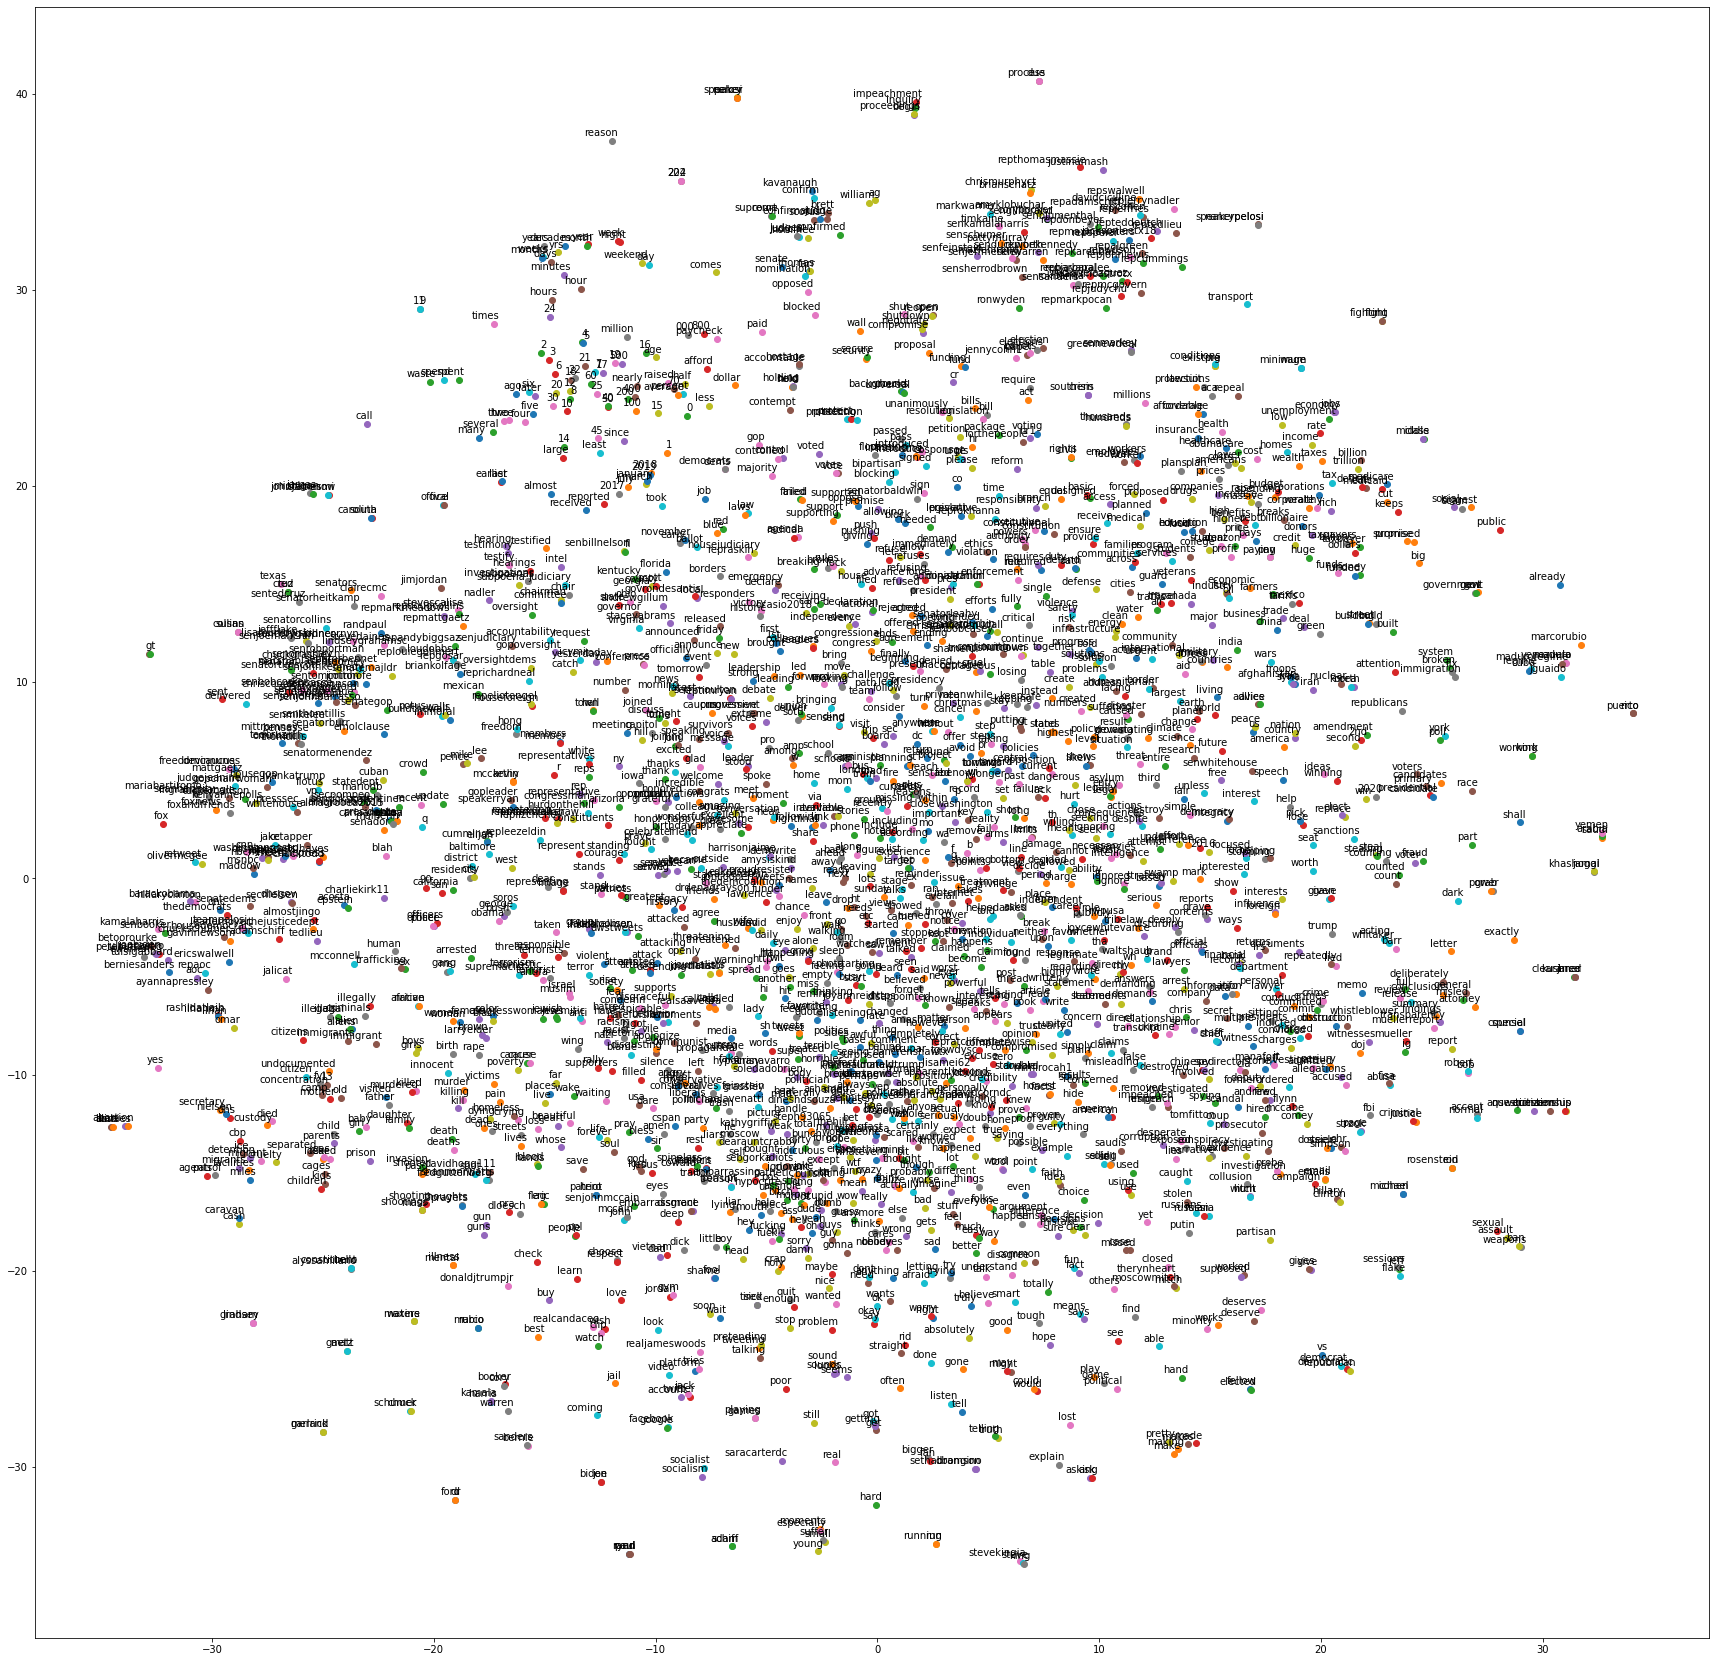

In [ ]:
"""2D Plot showing all the words in the corpus"""

tsne(model)

In [ ]:
"""extracting top 30 most associated words with 'realdonaldtrump','lindseygrahamsc', and 'speakerpelosi' """

topn=30

users=["realdonaldtrump","lindseygrahamsc","speakerpelosi"]
# users=["republican","democrat"]
for i in users:
  print("For user {} the most similar words are:".format(i))
  similar=model.most_similar(i, topn=topn)
  k=0
  for j in similar:
    k=k+1
    print("{}. {}".format(k,j[0]))

For user realdonaldtrump the most similar words are:
1. tariffs
2. presssec
3. buildthewall
4. vp
5. embarrassing
6. whitehouse
7. jalicat
8. leaderhoyer
9. foxnews
10. trumps
11. trumpshutdown
12. senatortomudall
13. mexico
14. obama
15. willing
16. america
17. disaster
18. thehill
19. senronjohnson
20. pence
21. meant
22. walls
23. promised
24. trade
25. desperate
26. stopping
27. keeps
28. trump
29. housedemocrats
30. continuing
For user lindseygrahamsc the most similar words are:
1. graham
2. lindsey
3. randpaul
4. repmarkmeadows
5. davidcicilline
6. senjeffmerkley
7. justinamash
8. sensanders
9. stevedaines
10. repratcliffe
11. senjohnkennedy
12. maziehirono
13. senduckworth
14. senorrinhatch
15. repmattgaetz
16. corybooker
17. repadamschiff
18. clairecmc
19. chuckgrassley
20. chrismurphyct
21. jiminhofe
22. rokhanna
23. jeffflake
24. brianschatz
25. stevescalise
26. johncornyn
27. senjoniernst
28. stabenow
29. marcorubio
30. amyklobuchar
For user speakerpelosi the most similar wo

In [ ]:

"""Function to extract top x number of most associated words with any other word"""


def get_words_user(users, topn=10):
  words_all=[]
  color=[]
  labels=[]
  k=0
  for i in users:
    similar=model.most_similar(i, topn=topn)
    words_all.append(i)
    color.append(k)
    labels.append(i)
    for j in similar:
      words_all.append(j[0])
      labels.append(i)
      color.append(k)
    k=k+1

  act_color=[]

  for i in color:
    if i==0:
      act_color.append("red")
    if i==1:
      act_color.append("green")
    if i==2:
      act_color.append("blue")
    if i==3:
      act_color.append("black")
  return words_all,act_color,labels


"""Function to plot 2D plot of vector embeddings of the most associated words with the given keywords list"""

def tsne2(model,words_all,act_color,labels,users,topn=10):
    
    words = []
    vectors = []

    for word in words_all:
        vectors.append(model[word])
        words.append(word)
    
    tsne = TSNE(perplexity=60, n_components=2, init='pca', n_iter=3000, random_state=11)
    xy = tsne.fit_transform(vectors)

    k=0
    plt.figure(figsize=(16, 16)) 
    for i in range(len(xy)):
        if ((i-4)%topn==0):
          
          plt.scatter(xy[i][0],xy[i][1], c=act_color[i], label=users[k])
          k=k+1
        else:
          plt.scatter(xy[i][0],xy[i][1], c=act_color[i])
        plt.annotate(words[i],
                     xy=(xy[i][0], xy[i][1]),
                     xytext=(6, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.legend()
    plt.show()


# Experiment 3 - plot 2: 2D plot to show the vector positions of words most associated to usernames "realdonaldtrump","lindseygrahamsc", and "speakerpelosi" in the extracted vocabulary after applying t-SNE on the word embedding vectors. We can notice 3 distinct clusters in the data.

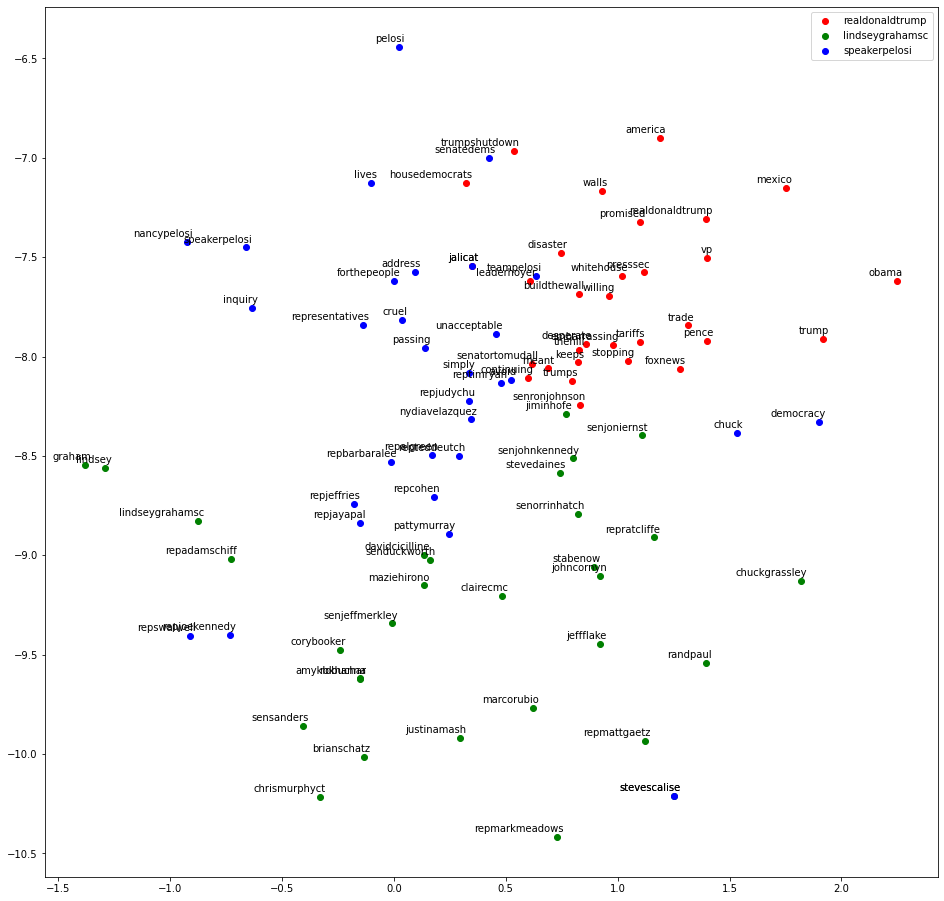

In [ ]:
"""Plotting the 2D plot of the vector embeddings of the words most associated with 'realdonaldtrump','lindseygrahamsc', and 'speakerpelosi' """
words_all,act_color,labels=get_words_user(users, topn)
tsne2(model,words_all,act_color,labels,users,topn)

In [ ]:
"""Function to plot 3D plot of vector embeddings of the most associated words with the given keywords list"""


def tsne3(model,words_all,act_color,users,topn=10):
    
    words = []
    vectors = []

    for word in words_all:
        vectors.append(model[word])
        words.append(word)
    
    tsne = TSNE(perplexity=60, n_components=3, init='pca', n_iter=3000, random_state=11)
    xy = tsne.fit_transform(vectors)

        
    ax = plt.figure(figsize=(30,20)).gca(projection='3d')
    k=0
    for i in range(len(xy)):
    #     plt.scatter(xy[i][0],xy[i][1], c=act_color[i])
    #     plt.annotate(words[i],
    #                  xy=(xy[i][0], xy[i][1]),
    #                  xytext=(6, 3),
    #                  textcoords='offset points',
    #                  ha='right',
    #                  va='bottom')

      if ((i-4)%topn==0):
        k=k+1

        ax.scatter(
            xs=xy[i][0], 
            ys=xy[i][1], 
            zs=xy[i][2],  
            c=act_color[i],
            label=users[k-1]
        )
      else:
        ax.scatter(
            xs=xy[i][0], 
            ys=xy[i][1], 
            zs=xy[i][2],  
            c=act_color[i],
        )

    ax.set_xlabel('tsne-one')
    ax.set_ylabel('tsne-two')
    ax.set_zlabel('tsne-three')
    ax.legend()
    plt.show()
 


# Experiment 3 - plot 3: 3D plot to show the vector positions of words most associated to usernames "realdonaldtrump","lindseygrahamsc", and "speakerpelosi" in the extracted vocabulary after applying t-SNE on the word embedding vectors. We can notice 3 distinct clusters in the data.

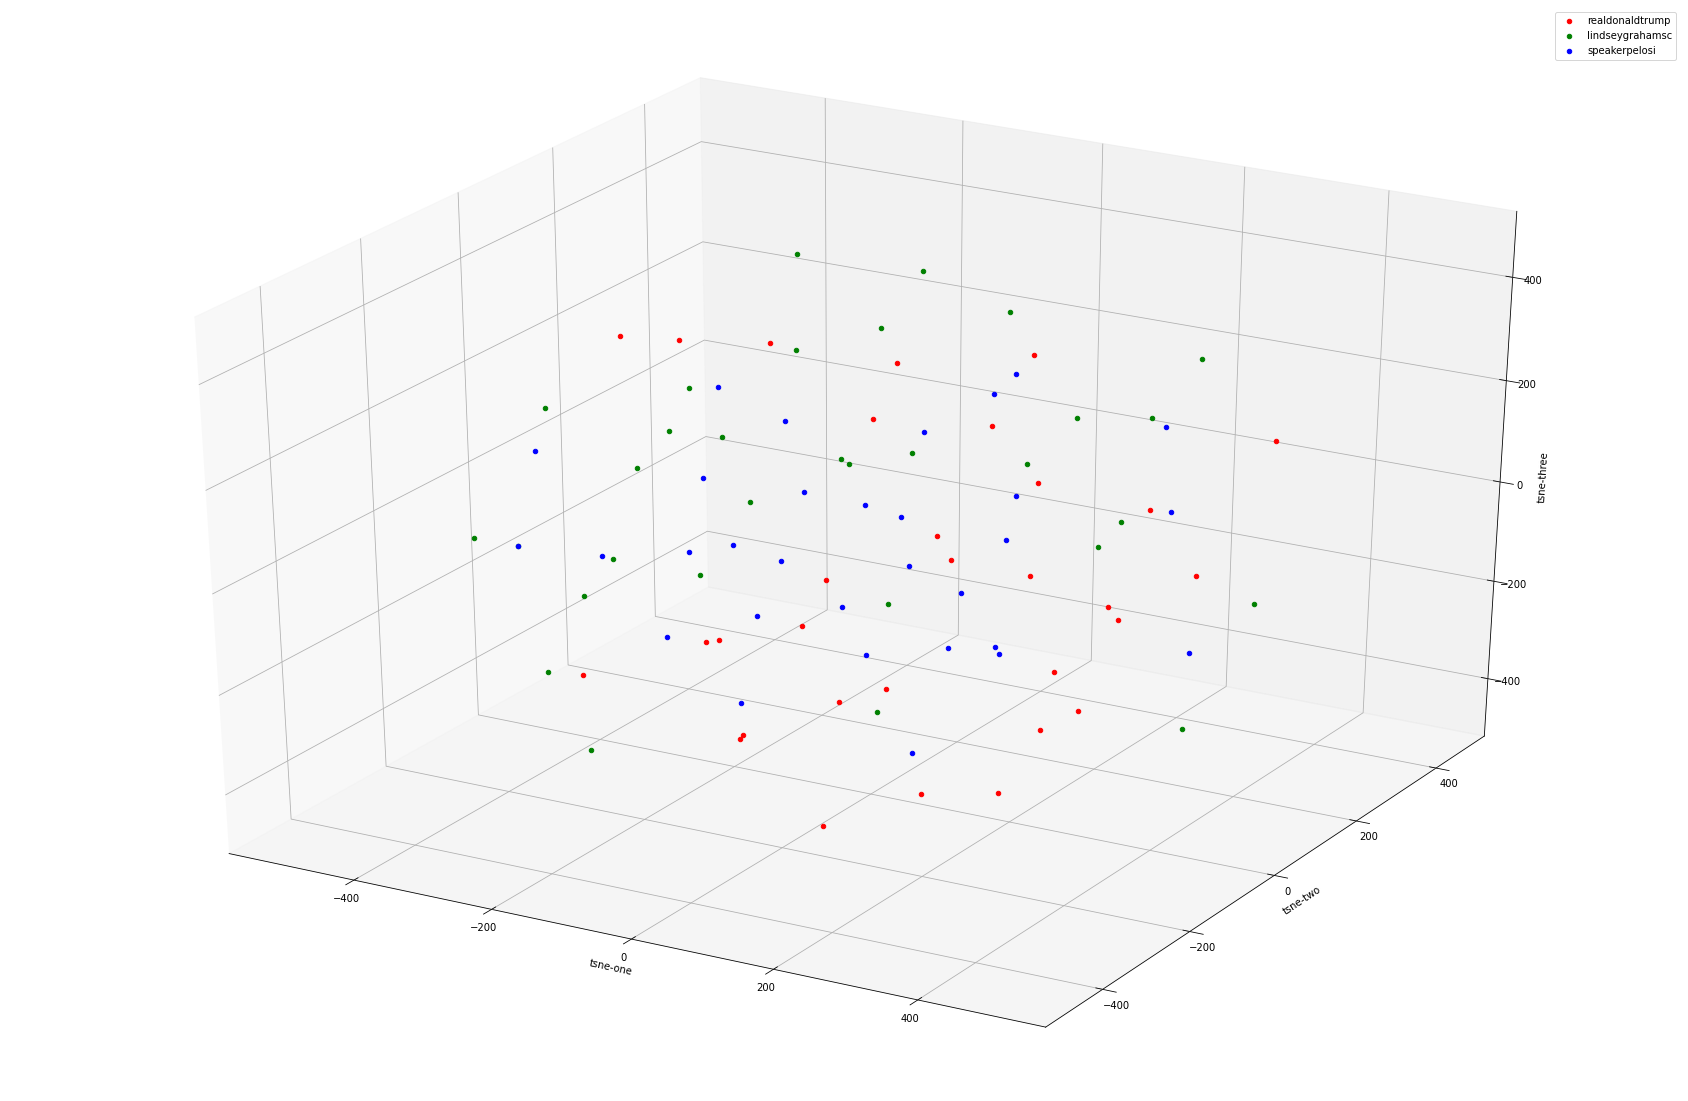

In [ ]:

"""Plotting the 3D plot of the vector embeddings of the words most associated with 'realdonaldtrump','lindseygrahamsc', and 'speakerpelosi' """

words_all,act_color,labels=get_words_user(users,topn)
tsne3(model,words_all,act_color,users,topn)

In [ ]:
"""Repeating the same experiment above for the words 'republican' and 'democrat'"""

users=["republican","democrat"]
for i in users:
  print("For the term {} the most similar words are:".format(i))
  similar=model.most_similar(i, topn=topn)
  k=0
  for j in similar:
    k=k+1
    print("{}. {}".format(k,j[0]))

For the term republican the most similar words are:
1. democratic
2. democrat
3. gop
4. opposed
5. republicans
6. stabenow
7. flake
8. farr
9. single
10. amash
11. vs
12. susan
13. johnjamesmi
14. publicly
15. thomas
16. collins
17. votes
18. supported
19. soledadobrien
20. legislative
21. voted
22. leader
23. seat
24. minority
25. nomination
26. elect
27. presidential
28. conservative
29. member
30. caucus
For the term democrat the most similar words are:
1. democratic
2. republican
3. vs
4. politician
5. candidate
6. race
7. liberal
8. democrats
9. primary
10. stabenow
11. member
12. attempt
13. realsaavedra
14. conservative
15. socialist
16. charliekirk11
17. majority
18. movement
19. single
20. leftist
21. points
22. poll
23. seat
24. semitic
25. representatives
26. supported
27. caucus
28. realcandaceo
29. presidential
30. dems


# Experiment 3 - plot 4: 2D plot to show the vector positions of words most associated to usernames "republican" and "democrat" in the extracted vocabulary after applying t-SNE on the word embedding vectors. 

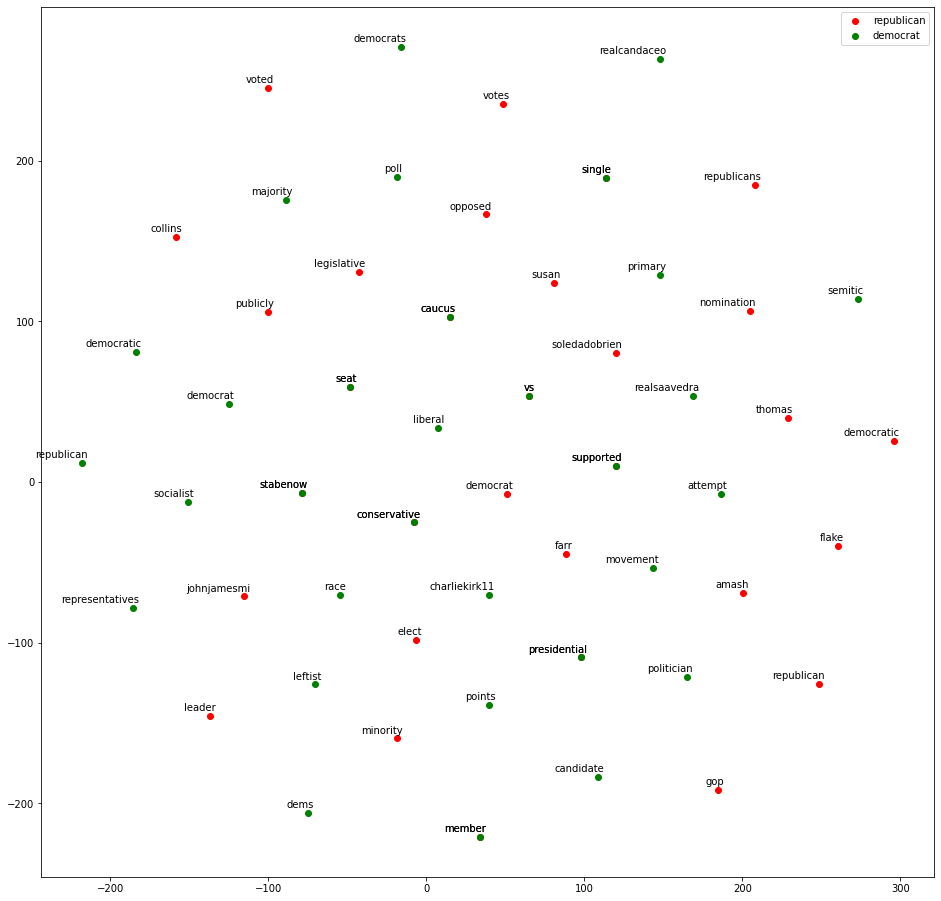

In [ ]:
users=["republican","democrat"]
words_all,act_color,labels=get_words_user(users,topn)
tsne2(model,words_all,act_color,labels,users,topn)

# Experiment 3 - plot 5: 3D plot to show the vector positions of words most associated to usernames "republican" and "democrat" in the extracted vocabulary after applying t-SNE on the word embedding vectors. 

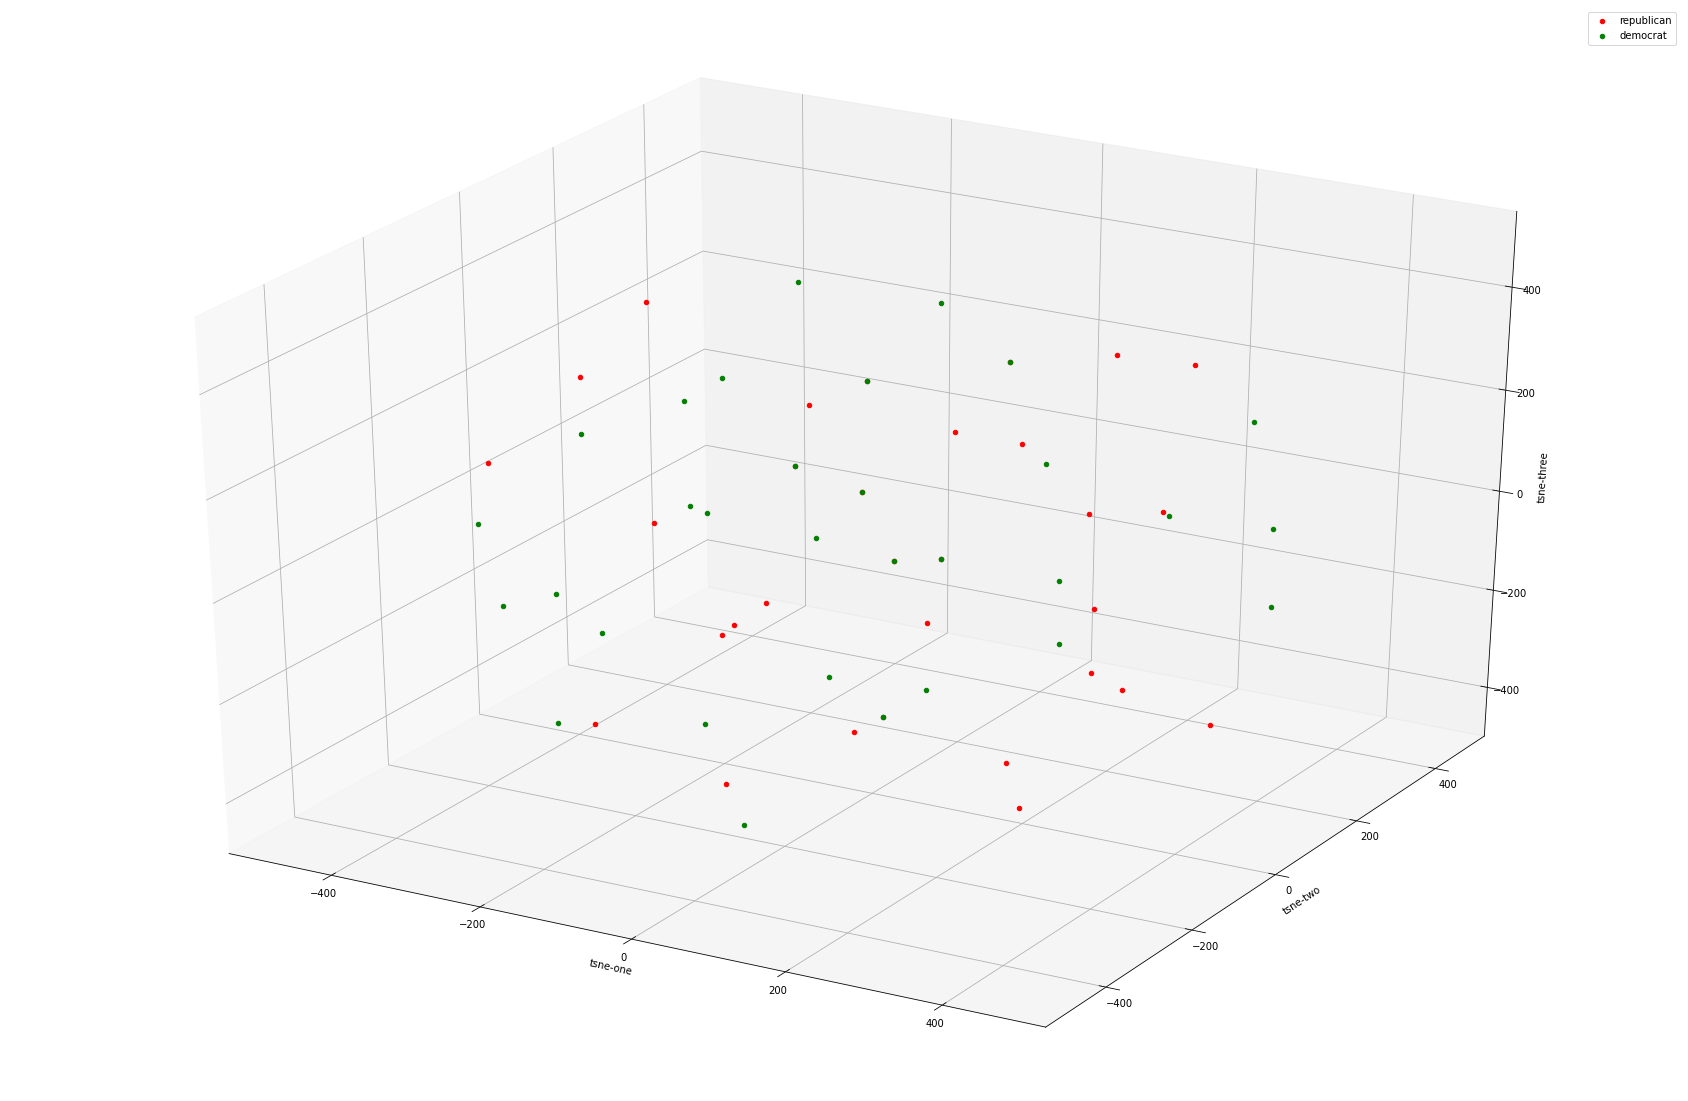

In [ ]:
tsne3(model,words_all,act_color,users,topn)